# **CREDIT CARD APPROVAL RATE PREDICTION**

The dataset consists of following csv files :

**Features name: (Credit_Card.csv)**

1. **Ind_ID**: Client ID

2. **Gender**: Gender information

3. **Car_owner**: Having car or not

4. **Propert_owner**: Having property or not

5. **Children**: Count of children

6. **Annual_income**: Annual income

7. **Type_Income**: Income type

8. **Education**: Education level

9. **Marital_status**: Marital_status

10. **Housing_type**: Living style

11. **Birthday_count**: Use backward count from current day (0), -1 means yesterday.

12. **Employed_days**: Start date of employment. Use backward count from current day (0). Positive value means, individual is currently unemployed.

13. **Mobile_phone**: Any mobile phone

14. **Work_phone**: Any work phone

15. **Phone**: Any phone number

16. **EMAIL_ID**: Any email ID

17. **Type_Occupation**: Occupation

18. **Family_Members**: Family size



**Another data set (Credit_card_label.csv) contains two key pieces of information**

1. **ID**: The joining key between application data and credit status data, same is Ind_ID

2. **Label**: 0 is application approved and 1 is application rejected.

## **SECTION 1: QUESTIONS TO ANSWER**

**1. Why is your proposal important in today’s world? How predicting a good client is worthy for a bank?**

The proposal's importance lies in the fact that it revolutionize the way of banks assess creditworthiness, make leading decisions and benefitting both financial institutions and their customers.

Predicting a good client is essential for banks to reduce financial risk, fraud prevention, improve customer experience and remain competitive.

**2. How is it going to impact the banking sector?**

The model helps banks in :

1. Reducing default risks.
2. Improving operational efficiency.
3. Enhancing customer satisfaction.
4. Boosting competitive advantage.
5. Ensuring regulatory compliance.

**3. If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any bank in India.**

The potential gap in knowledge is the need for more comprehensive and up-to-date data specific to the Indian banking context.

The proposed model will make indian banks more informed and helps them in data-driven credit decisions, adapting to evolving consumer trends, reducing non-performing assets, and ultimately contributing to the stability and growth of the banking sector in India.

## **SECTION 2: INITIAL HYPOTHESIS (or HYPOTHESES)**

1. **Property Owners** are more likely to have their credit card applications approved.
2. Higher the **Annual income** higher the chance of getting credit card application approved.
3. Individuals with a **higher education level** are less likely to have their applications rejected.
4. Lesser the **Employed days**, lesser may be the credit card approval rates.
5. Certain **demographic factors** like gender and marital status may also impact credit card approval rates.

## **SECTION 3: DATA ANALYSIS SECTION**

### **IMPORTING AND UNDERSTANDING THE DATASET**

In [ ]:
# Importing all important libraries for Data analysis and model building

# Data manipulation libraries
import pandas as pd
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# For missing value visualization
!pip install missingno
import missingno as msno

# For encoding categorical columns
!pip install category_encoders
import category_encoders as ce

# For standardization
from sklearn.preprocessing import StandardScaler

# For splitting the dataset into training and testing, for performing cross validation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import StratifiedKFold

# For balancing the dataset using SMOTE library
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

# For feature selection
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# For model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

# For model evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc, average_precision_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve

# For cross validation
from sklearn.model_selection import GridSearchCV

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 1.4 MB/s eta 0:00:00


In [ ]:
# Importing the feature and label files as pandas dataframe(df)
credit_card_path = '/content/drive/MyDrive/Capstone_Project_1_Datasets(25_08_2023)/Credit_card.csv'
credit_card_label_path = '/content/drive/MyDrive/Capstone_Project_1_Datasets(25_08_2023)/Credit_card_label.csv'
credit_card_original = pd.read_csv(credit_card_path)
credit_card_label_original = pd.read_csv(credit_card_label_path)

In [ ]:
# Looking at top 5 records from credit_card_original df
credit_card_original.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [ ]:
# Looking at top 5 records from credit_card_label_original df
credit_card_label_original.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [ ]:
# Merging credit_card_original df and credit_card_label_original df as credit_card_full_original df
credit_card_full_original = pd.merge(credit_card_original, credit_card_label_original, on = 'Ind_ID', how = 'inner')
credit_card_full_original

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0


### **BASIC EXPLORATION OF DATA**

In [ ]:
# Coping credit_card_full_original df to credit_card_full df
credit_card_full = credit_card_full_original.copy()

In [ ]:
# Finding the shape of credit_card_full df
credit_card_full.shape

(1548, 19)

In [ ]:
# Finding basic information credit_card_full df
credit_card_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [ ]:
# Description of credit_card_full df
credit_card_full.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


In [ ]:
# Finding the duplicates in credit_card_full df
duplicate_rows = credit_card_full[credit_card_full.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [Ind_ID, GENDER, Car_Owner, Propert_Owner, CHILDREN, Annual_income, Type_Income, EDUCATION, Marital_status, Housing_type, Birthday_count, Employed_days, Mobile_phone, Work_Phone, Phone, EMAIL_ID, Type_Occupation, Family_Members, label]
Index: []


**FINDING MISSING VALUES**

In [ ]:
# Sum of the missing value of credit_card_full df
credit_card_full.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [ ]:
# Percentage of missing value in columns of credit_card_full df
features_with_na=[features for features in credit_card_full.columns if credit_card_full[features].isnull().sum()>1]
for feature in features_with_na:
    print(feature, np.round((credit_card_full[feature].isnull().mean())*100, 2),'% missing values')

GENDER 0.45 % missing values
Annual_income 1.49 % missing values
Birthday_count 1.42 % missing values
Type_Occupation 31.52 % missing values


### **RENAMING OF COLUMNS**

In [ ]:
# Converting Birthday_count days into years and rounding off to 2 decimal places
credit_card_full['Birthday_count'] = abs(round((credit_card_full['Birthday_count']/365),2))
credit_card_full.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.43,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.14,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,37.14,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.14,-586,1,1,1,0,NaN,2,1


In [ ]:
# Converting Employed_days into years and rounding off to 2 decimal places
credit_card_full['Employed_days'] = round((credit_card_full['Employed_days']/365),2)
credit_card_full.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.43,1000.67,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.14,-1.61,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-1.61,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,37.14,-1.61,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.14,-1.61,1,1,1,0,NaN,2,1


In [ ]:
# Renaming of columns
credit_card_full = credit_card_full.rename(columns = {'Ind_ID' : 'Ind_Id', 'GENDER' : 'Gender', 'Propert_Owner' : 'Property_Owner', 'CHILDREN' : 'Children',
                                   'Annual_income' : 'Annual_Income', 'EDUCATION' : 'Education', 'Marital_status' : 'Marital_Status',
                                   'Housing_type' : 'Housing_Type', 'Birthday_count':'Years_Of_Birth', 'Employed_days' : 'Employed_Years',
                                   'Mobile_phone' : 'Mobile_Phone', 'EMAIL_ID' : 'Email_Id', 'label' : 'Label'})
credit_card_full.head()

,Ind_Id,Gender,Car_Owner,Property_Owner,Children,Annual_Income,Type_Income,Education,Marital_Status,Housing_Type,Years_Of_Birth,Employed_Years,Mobile_Phone,Work_Phone,Phone,Email_Id,Type_Occupation,Family_Members,Label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.43,1000.67,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.14,-1.61,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-1.61,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,37.14,-1.61,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.14,-1.61,1,1,1,0,NaN,2,1


### **DELETING UNWANTED COLUMN USING DOMAIN KNOWLEDGE**

In [ ]:
# Deleting unwanted columns and saving it in credit_card_uwc df
credit_card_uwc = credit_card_full.drop(['Mobile_Phone','Work_Phone','Phone','Email_Id'], axis = 1)
credit_card_uwc.head()

,Ind_Id,Gender,Car_Owner,Property_Owner,Children,Annual_Income,Type_Income,Education,Marital_Status,Housing_Type,Years_Of_Birth,Employed_Years,Type_Occupation,Family_Members,Label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.43,1000.67,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.14,-1.61,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-1.61,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,37.14,-1.61,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.14,-1.61,NaN,2,1


### **DATA ANALYSIS USING VISUALIZATION**

In [ ]:
# Copying credit_card_uwc df into credit_card_analysis df
credit_card_analysis = credit_card_uwc.copy()

**1. Gender Column**

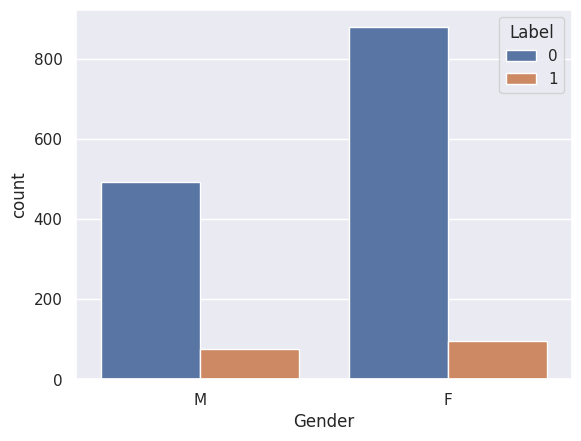

In [ ]:
# Plotting countplot
sns.set()
sns.countplot(x = 'Gender', data = credit_card_analysis, hue = 'Label')
plt.show()

In [ ]:
# To find the value counts of Gender column after grouping with Label column
credit_card_analysis.groupby('Label')['Gender'].value_counts()

Label  Gender
0      F         878
       M         493
1      F          95
       M          75
Name: Gender, dtype: int64

**Inference :**


1.   More number of Female candidates **(973)** applied for credit card than male candidates **(568)**.
2.   **90.24%** of female candidate's application is approved while only **86.80%** of male candidate's application is approved for credit card.
3. So, **Female candidates have highest credit card approval rate (90.24%)**.



**2. Car_Owner Column**

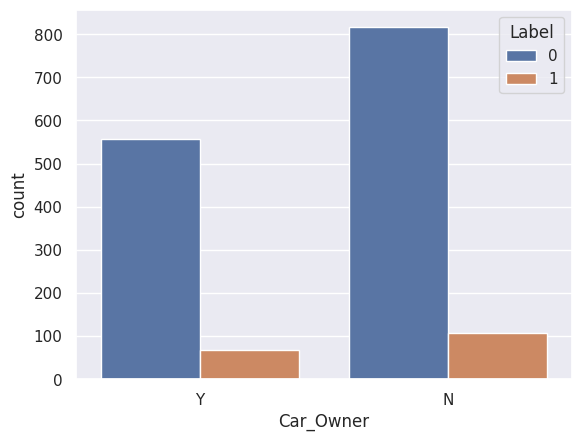

In [ ]:
# Plotting countplot
sns.countplot(x = 'Car_Owner', data = credit_card_analysis, hue = 'Label')
plt.show()

In [ ]:
# To find the value counts of Car_Owner column after grouping with Label column
credit_card_analysis.groupby('Label')['Car_Owner'].value_counts()

Label  Car_Owner
0      N            816
       Y            557
1      N            108
       Y             67
Name: Car_Owner, dtype: int64

**Inference :**

1.   Car owners **(624)** and those who don't own a car **(924)** have applied for credit card.
2.   Car owner's approval rate is **89.26%** but those who don't own a car has a approval rate of **88.31%**.
3. So, **owning a car doesn't have a impact on credit card approval rate**.



**3. Property_Owner column**

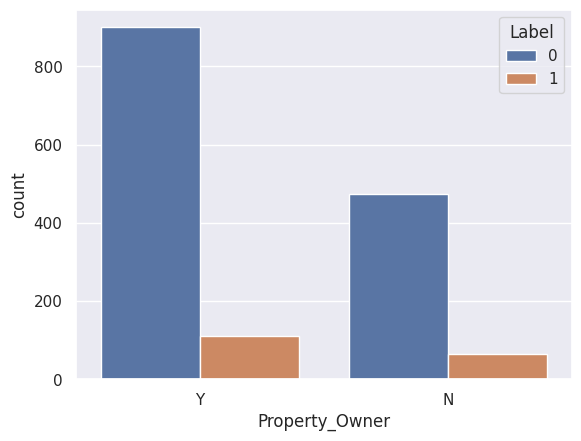

In [ ]:
# Plotting counterplot
sns.countplot(x = 'Property_Owner', data = credit_card_analysis, hue = 'Label')
plt.show()

In [ ]:
# To find the value counts of Property_Owner column after grouping with Label column
credit_card_analysis.groupby('Label')['Property_Owner'].value_counts()

Label  Property_Owner
0      Y                 900
       N                 473
1      Y                 110
       N                  65
Name: Property_Owner, dtype: int64

**Inference**

1.   Property owners **(1010)** and those who don't own a property **(538)** have applied for credit card.
2.   Approval rate of credit card for property owners is **89.11%** and those who don't own a property is  **87.92%**.
3. Therefore, **there is not much difference between both in credit card approval rate**.



**4. Children column**

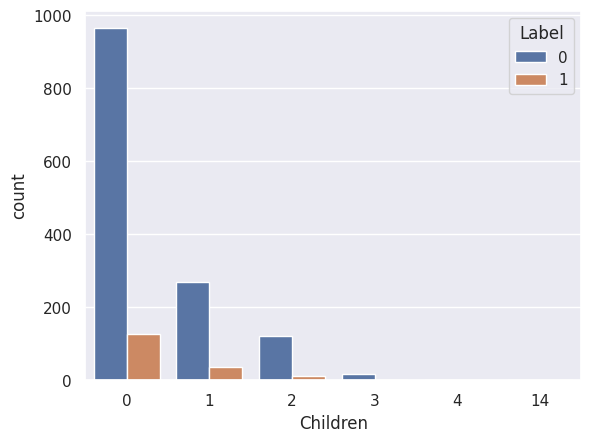

In [ ]:
# Plotting countplot
sns.countplot(x='Children', hue='Label', data=credit_card_analysis)
plt.show()

**Inference** : As **number of Children increase** **approval rate** of credit card also **decreases**.

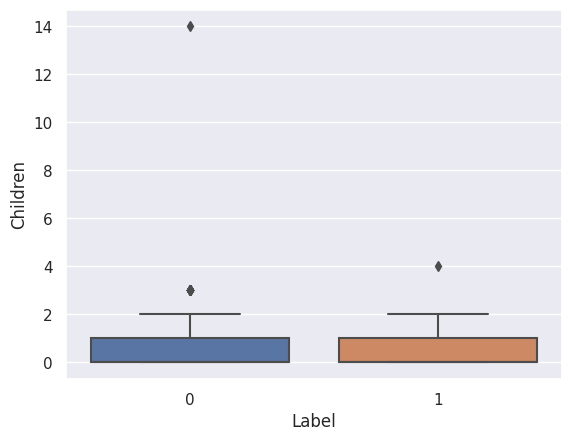

In [ ]:
# Plotting boxplot
sns.boxplot(x ='Label', y='Children', data=credit_card_analysis)
plt.show()

**Inference** : There are **few outliers in Children column** both in approved and rejected applications.

**5. Annual_Income Column**

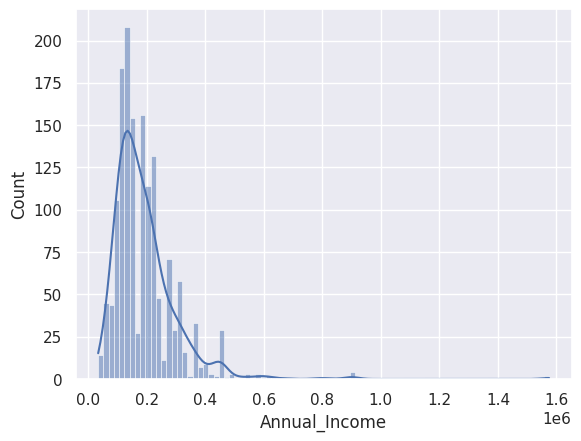

In [ ]:
# Plotting histplot
sns.histplot(x='Annual_Income', data=credit_card_analysis, kde=True)
plt.show()

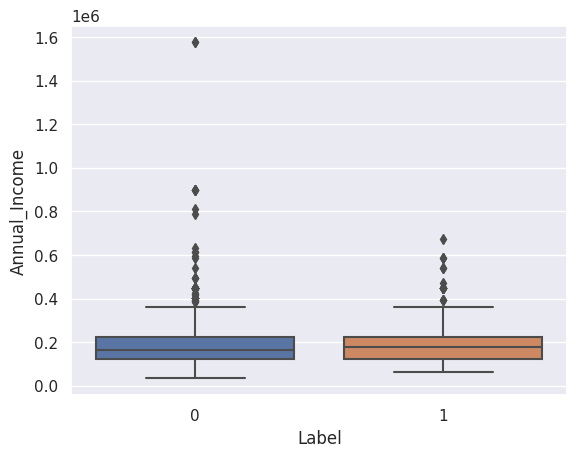

In [ ]:
# Plotting boxplot
sns.boxplot(x = 'Label', y='Annual_Income', data=credit_card_analysis)
plt.show()

**Inference** : There are **lot of outliers in Annual_Income column** both in approved and rejected applications.

**6. Type_Income Column**

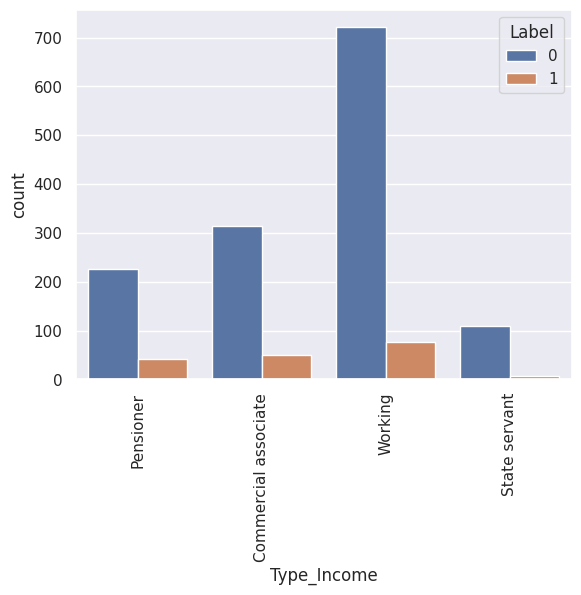

In [ ]:
# Plotting countplot
sns.countplot(x = 'Type_Income', data = credit_card_analysis, hue = 'Label')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# To find the value counts of Type_Income column after grouping with Label column
credit_card_analysis.groupby('Label')['Type_Income'].value_counts()

Label  Type_Income         
0      Working                 721
       Commercial associate    315
       Pensioner               227
       State servant           110
1      Working                  77
       Commercial associate     50
       Pensioner                42
       State servant             6
Name: Type_Income, dtype: int64

**Inference :**

1.   Working people **(798)**, Commercial associates **(365)**, Pensioners **(269)** and State servants **(116)** have applied for credit card.
2.   Credit card approval rate of Working people **(90.35%)**, Commercial associates **(86.30%)**, Pensioners **(84.39%)** and State servants **(94.83%)**.
3. For obvious reasons, **State servants have highest approval rates (94.83%)** and **Pensioners have lowest approval rates (84.39%)**.


**7. Education Column**

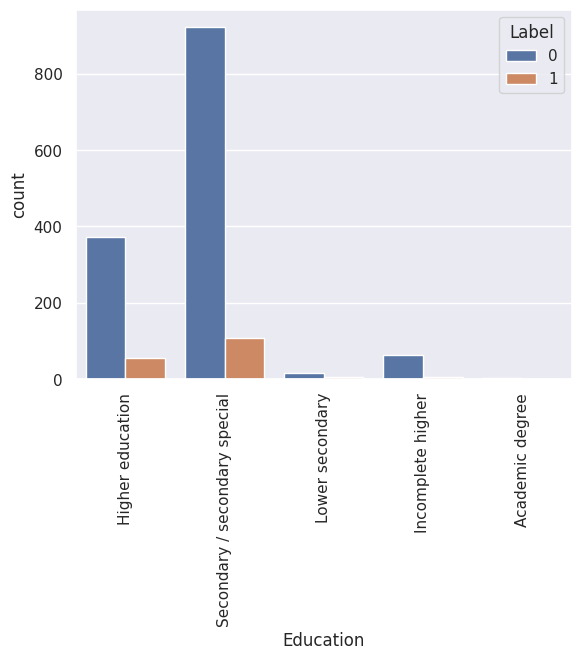

In [ ]:
# Plotting countplot
sns.countplot(x = 'Education', data = credit_card_analysis, hue = 'Label')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# To find the value counts of Education column after grouping with Label column
credit_card_analysis.groupby('Label')['Education'].value_counts()

Label  Education                    
0      Secondary / secondary special    922
       Higher education                 371
       Incomplete higher                 63
       Lower secondary                   15
       Academic degree                    2
1      Secondary / secondary special    109
       Higher education                  55
       Lower secondary                    6
       Incomplete higher                  5
Name: Education, dtype: int64

**Inference** :

1.   Persons who have educated till Secondary / secondary special **(1101)**, Higher education **(426)**, Incomplete higher **(68)**, Lower secondary **(21)** and Academic degree **(2)** have applied for credit card.
2.   Approval rate for credit card for Secondary / secondary special **(90.10%)**, Higher education **(87.09%)**, Incomplete higher **(92.65%)**, Lower secondary **(71.43%)** and Academic degree **(100%)**.
3. **Academic degree (100%)** approval rate which is the **highest** and **lowest being Lower secondary (71.43%)**.



**8. Marital_Status Column**

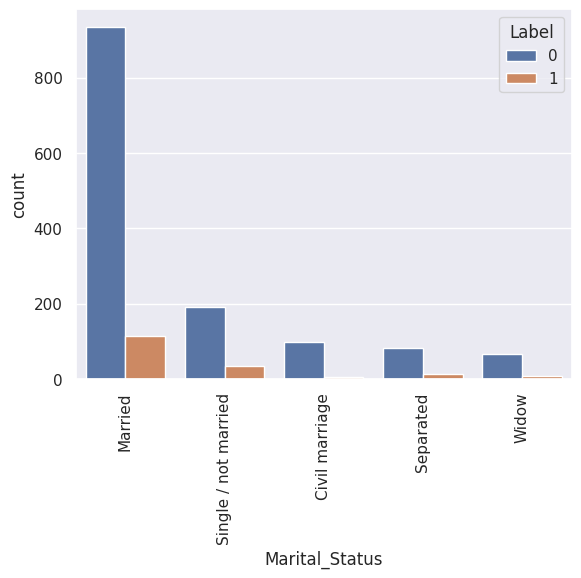

In [ ]:
# Plotting countplot
sns.countplot(x = 'Marital_Status', data = credit_card_analysis, hue = 'Label')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# To find the value counts of Marital_Status column after grouping with Label column
credit_card_analysis.groupby('Label')['Marital_Status'].value_counts()

Label  Marital_Status      
0      Married                 935
       Single / not married    192
       Civil marriage           97
       Separated                82
       Widow                    67
1      Married                 114
       Single / not married     35
       Separated                14
       Widow                     8
       Civil marriage            4
Name: Marital_Status, dtype: int64

**Inference :**

1.   Married **(1049)**, Single / not married **(227)**, Civil marriage **(101)**, Separated **(96)**, Widow **(75)** have applied for credit card.
2.   Married **(89.13%)**, Single / not married **(84.58%)**, Civil marriage **(96.04%)**, Separated **(85.42%)**, Widow **(89.33%)** have these approval rates.
3. **Civil married person** have **96.04%** approval rate being **highest** and **lowest being Single / not married at 84.58%**.



**9. Housing_Type Column**

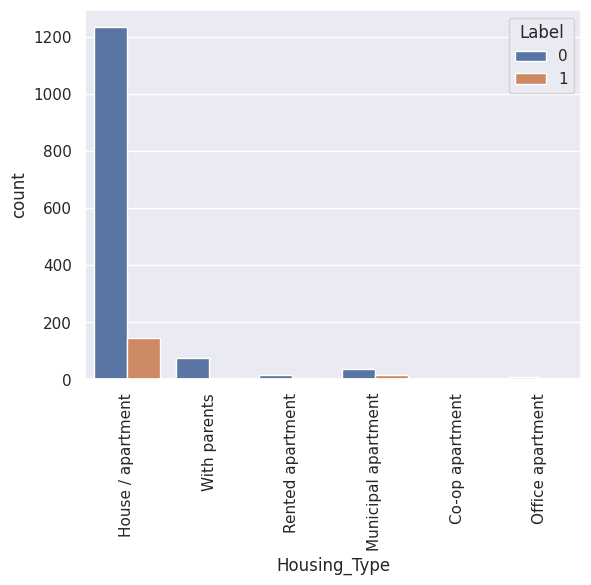

In [ ]:
# Plotting countplot
sns.countplot(x = 'Housing_Type', data = credit_card_analysis, hue = 'Label')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# To find the value counts of Housing_Type column after grouping with Label column
credit_card_analysis.groupby('Label')['Housing_Type'].value_counts()

Label  Housing_Type       
0      House / apartment      1234
       With parents             75
       Municipal apartment      37
       Rented apartment         17
       Office apartment          7
       Co-op apartment           3
1      House / apartment       146
       Municipal apartment      16
       With parents              5
       Rented apartment          4
       Co-op apartment           2
       Office apartment          2
Name: Housing_Type, dtype: int64

**Inference** :

1.   People living in House / apartment **(1380)**, With parents **(80)**, Municipal apartment **(53)**, Rented apartment **(21)**, Office apartment **(9)**, Co-op apartment **(5)** have applied for credit card.
2.   Approval rate for credit card for people living in House / apartment **(89.42%)**, With parents **(93.75%)**, Municipal apartment **(69.81%)**, Rented apartment **(80.95%)**, Office apartment **(77.78%)**, Co-op apartment **(60%)**.
3. **Person living with parents have highest (93.75%) approval rate** and **Co-op apartment have lowest approval rate (60%)**.



**10. Years_Of_Birth Column**

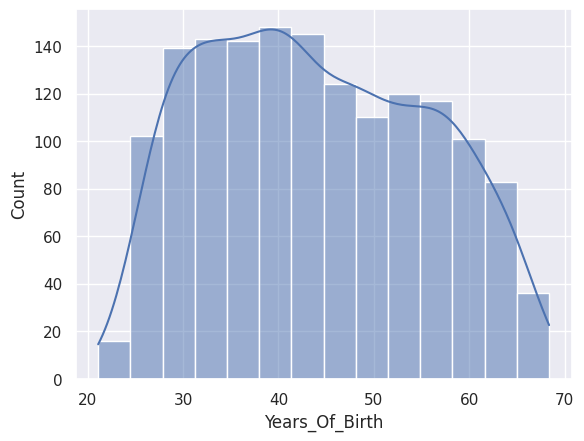

In [ ]:
# Plotting histplot
sns.histplot(x='Years_Of_Birth', data =credit_card_analysis, kde=True)
plt.show()

**Inference** : Years_Of_Birth is **not normally distributed**.

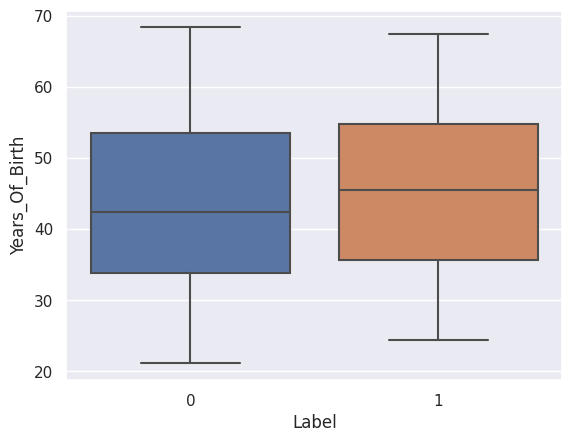

In [ ]:
# Plotting boxplot
sns.boxplot(x='Label', y='Years_Of_Birth', data=credit_card_analysis)
plt.show()

**Inference** : **No outliers** in **Years_Of_Birth** column.

**11. Employed_Years Column**

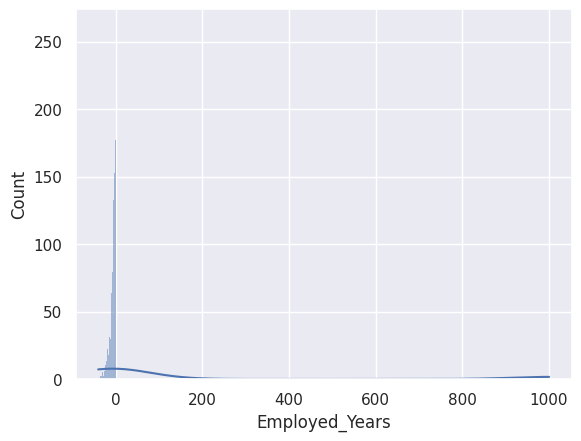

In [ ]:
# Plotting histplot
sns.histplot(x='Employed_Years', data =credit_card_analysis, kde=True)
plt.show()

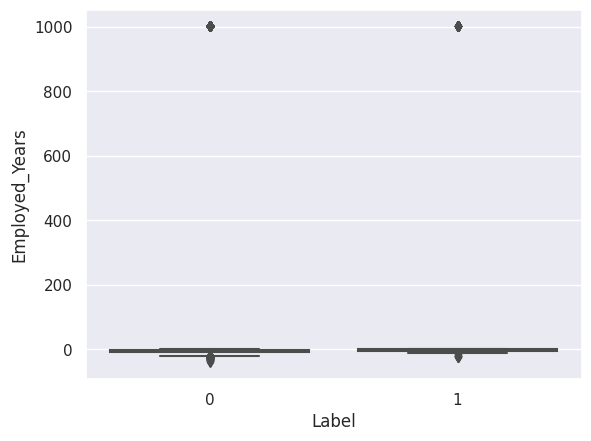

In [ ]:
# Plotting boxplot
sns.boxplot(x='Label', y='Employed_Years', data=credit_card_analysis)
plt.show()

**Inference** : **Lot of outliers** present **in Employed_Years** Column.

**12. Type_Occupation Column**

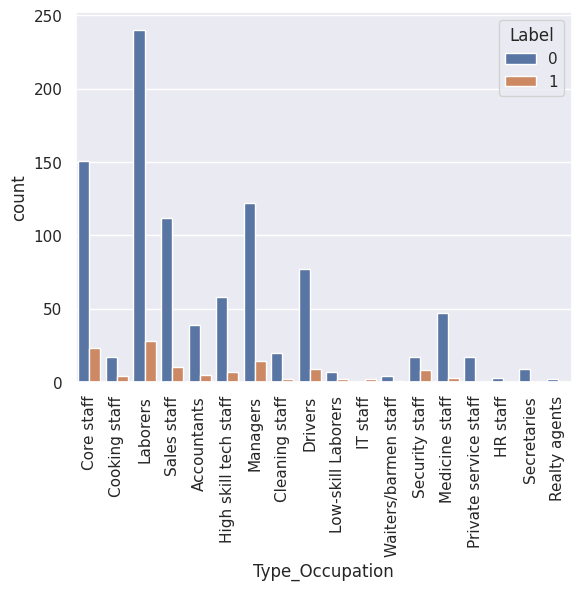

In [ ]:
# Plotting countplot
sns.countplot(x = 'Type_Occupation', data = credit_card_analysis, hue = 'Label')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# To find the value counts of Type_Occupation column after grouping with Label column
credit_card_analysis.groupby('Label')['Type_Occupation'].value_counts()

Label  Type_Occupation      
0      Laborers                 240
       Core staff               151
       Managers                 122
       Sales staff              112
       Drivers                   77
       High skill tech staff     58
       Medicine staff            47
       Accountants               39
       Cleaning staff            20
       Cooking staff             17
       Private service staff     17
       Security staff            17
       Secretaries                9
       Low-skill Laborers         7
       Waiters/barmen staff       4
       HR staff                   3
       Realty agents              2
1      Laborers                  28
       Core staff                23
       Managers                  14
       Sales staff               10
       Drivers                    9
       Security staff             8
       High skill tech staff      7
       Accountants                5
       Cooking staff              4
       Medicine staff             3

**Inference** :

1.   Laborers **(268)**, Core staff **(174)**, Managers **(136)**, Sales staff **(132)**, Drivers **(86)**, High skill tech staff **(65)**, Medicine staff **(50)**, Accountants **(44)**, Cleaning staff **(22)**, Cooking staff **(21)**, Private service staff **(17)**, Security staff **(25)**, Secretaries **(9)**,Low-skill Laborers **(9)**, Waiters/barmen staff **(5)**, HR staff **(3)**, Realty agents **(2)**, IT staff **(2)** have applied for credit card.
2.   Approval rate of credit card for Laborers **(89.55%)**, Core staff **(86.78%)**, Managers **(89.71%)**, Sales staff **(84.85%)**, Drivers **(89.53%)**, High skill tech staff **(89.23%)**, Medicine staff **(94%)**, Accountants **(88.64%)**, Cleaning staff **(90.91%)**, Cooking staff **(80.95%)**, Private service staff **(100%)**, Security staff **(68%)**, Secretaries **(100%)**,Low-skill Laborers **(77.78%)**, Waiters/barmen staff **(80%)**, HR staff **(100%)**, Realty agents **(100%)**, IT staff **(0%)**.
3. **Private service staff** **(100%)**, **Secretaries** **(100%)** and **HR staff** **(100%)** have **highest approval rate** and **IT staff (0%) have lowest approval rate**.



**13. Family_Members Column**

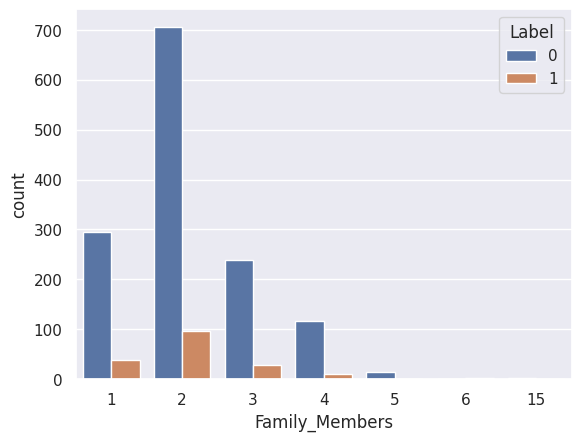

In [ ]:
# Plotting countplot
sns.countplot(x='Family_Members', hue='Label', data=credit_card_analysis)
plt.show()

**Inference** :

1.   Person having family members as 2 have applied highest and family member above 5 have applied lowest for credit card.
2.   **Approval rate** is **decreasing as number of family members increasing**.



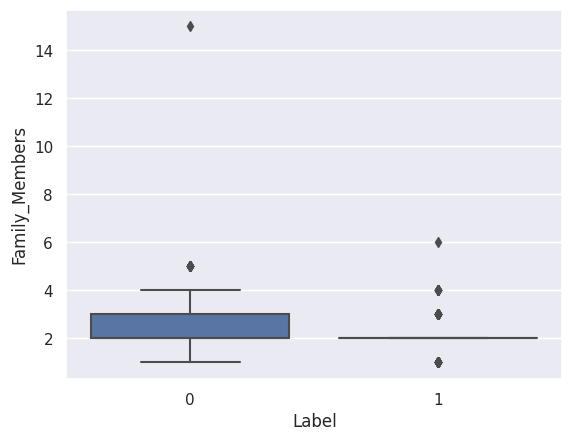

In [ ]:
# Plotting boxplot
sns.boxplot(x='Label', y='Family_Members', data=credit_card_analysis)
plt.show()

**Inference** : There are **lot of outlier especially for rejected application**.

**MULTIVARIATE ANALYSIS**

In [ ]:
# Selecting numerical columns
numerical_cols = credit_card_analysis.select_dtypes(include=['int64', 'float64']).columns.tolist()
cc_analysis_numerical = credit_card_analysis[numerical_cols]
cc_analysis_numerical.head()

,Ind_Id,Children,Annual_Income,Years_Of_Birth,Employed_Years,Family_Members,Label
0,5008827,0,180000.0,51.43,1000.67,2,1
1,5009744,0,315000.0,37.14,-1.61,2,1
2,5009746,0,315000.0,NaN,-1.61,2,1
3,5009749,0,NaN,37.14,-1.61,2,1
4,5009752,0,315000.0,37.14,-1.61,2,1


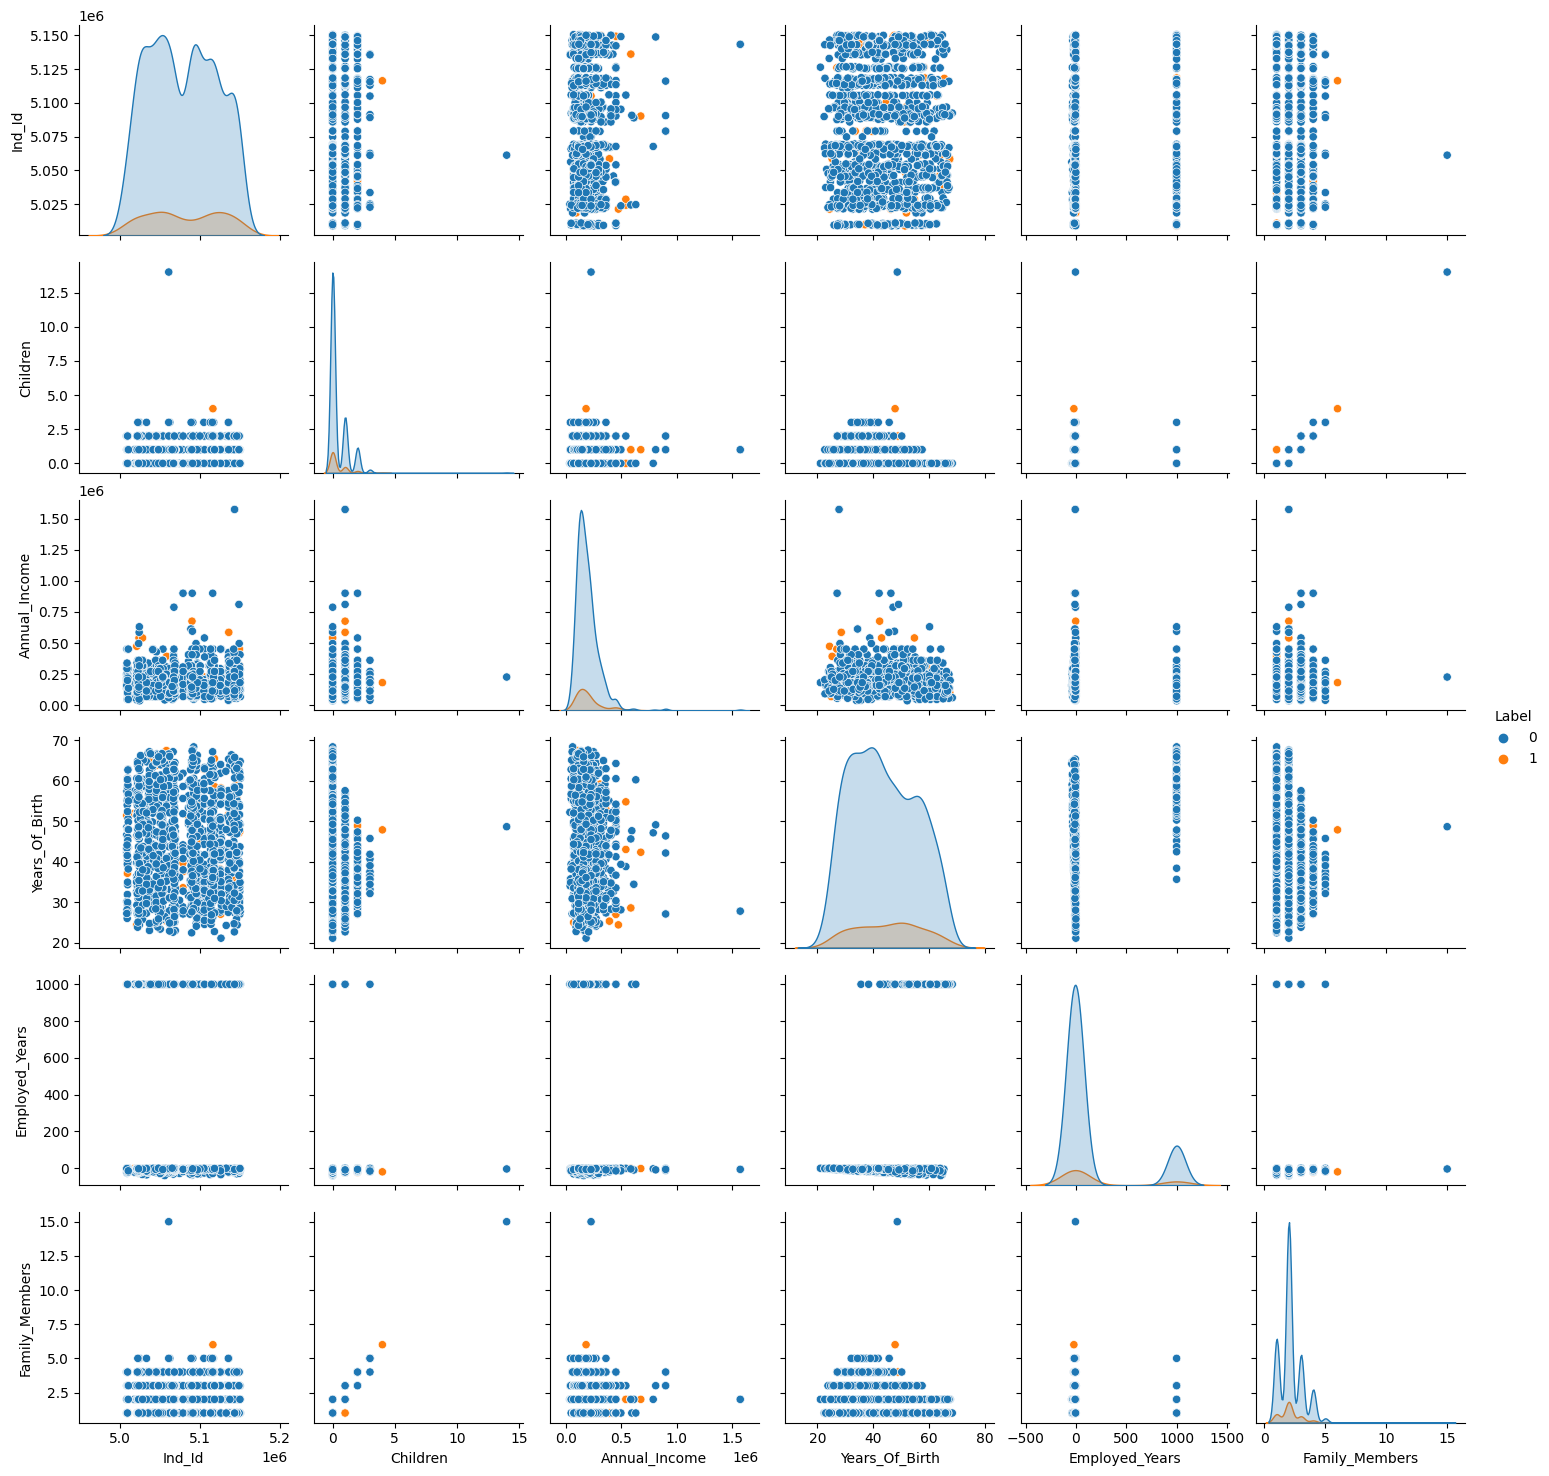

In [ ]:
# Plotting pairplot
sns.pairplot(cc_analysis_numerical, hue = 'Label')
plt.show()

In [ ]:
# Finding correlation
cc_analysis_numerical.corr()

,Ind_Id,Children,Annual_Income,Years_Of_Birth,Employed_Years,Family_Members,Label
Ind_Id,1.000000,0.032535,0.030147,-0.022905,-0.055396,0.016950,0.016796
Children,0.032535,1.000000,0.078497,-0.279715,-0.219095,0.890248,-0.021646
Annual_Income,0.030147,0.078497,1.000000,-0.111639,-0.160175,0.050957,0.027456
Years_Of_Birth,-0.022905,-0.279715,-0.111639,1.000000,0.619032,-0.266528,0.045108
Employed_Years,-0.055396,-0.219095,-0.160175,0.619032,1.000000,-0.238705,0.031408
Family_Members,0.016950,0.890248,0.050957,-0.266528,-0.238705,1.000000,-0.030709
Label,0.016796,-0.021646,0.027456,0.045108,0.031408,-0.030709,1.000000


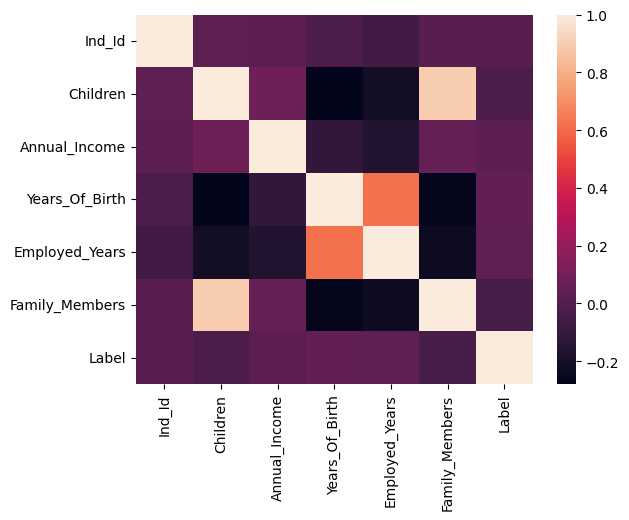

In [ ]:
# Plotting heatmap
sns.heatmap(cc_analysis_numerical.corr())
plt.show()

### **DATA CLEANING**

**VISUALIZATION OF MISSING VALUES**

In [ ]:
# Copying credit_card_analysis into credit_card_mv
credit_card_mv = credit_card_analysis.copy()

In [ ]:
# Sum of null values
credit_card_mv.isnull().sum()

Ind_Id               0
Gender               7
Car_Owner            0
Property_Owner       0
Children             0
Annual_Income       23
Type_Income          0
Education            0
Marital_Status       0
Housing_Type         0
Years_Of_Birth      22
Employed_Years       0
Type_Occupation    488
Family_Members       0
Label                0
dtype: int64

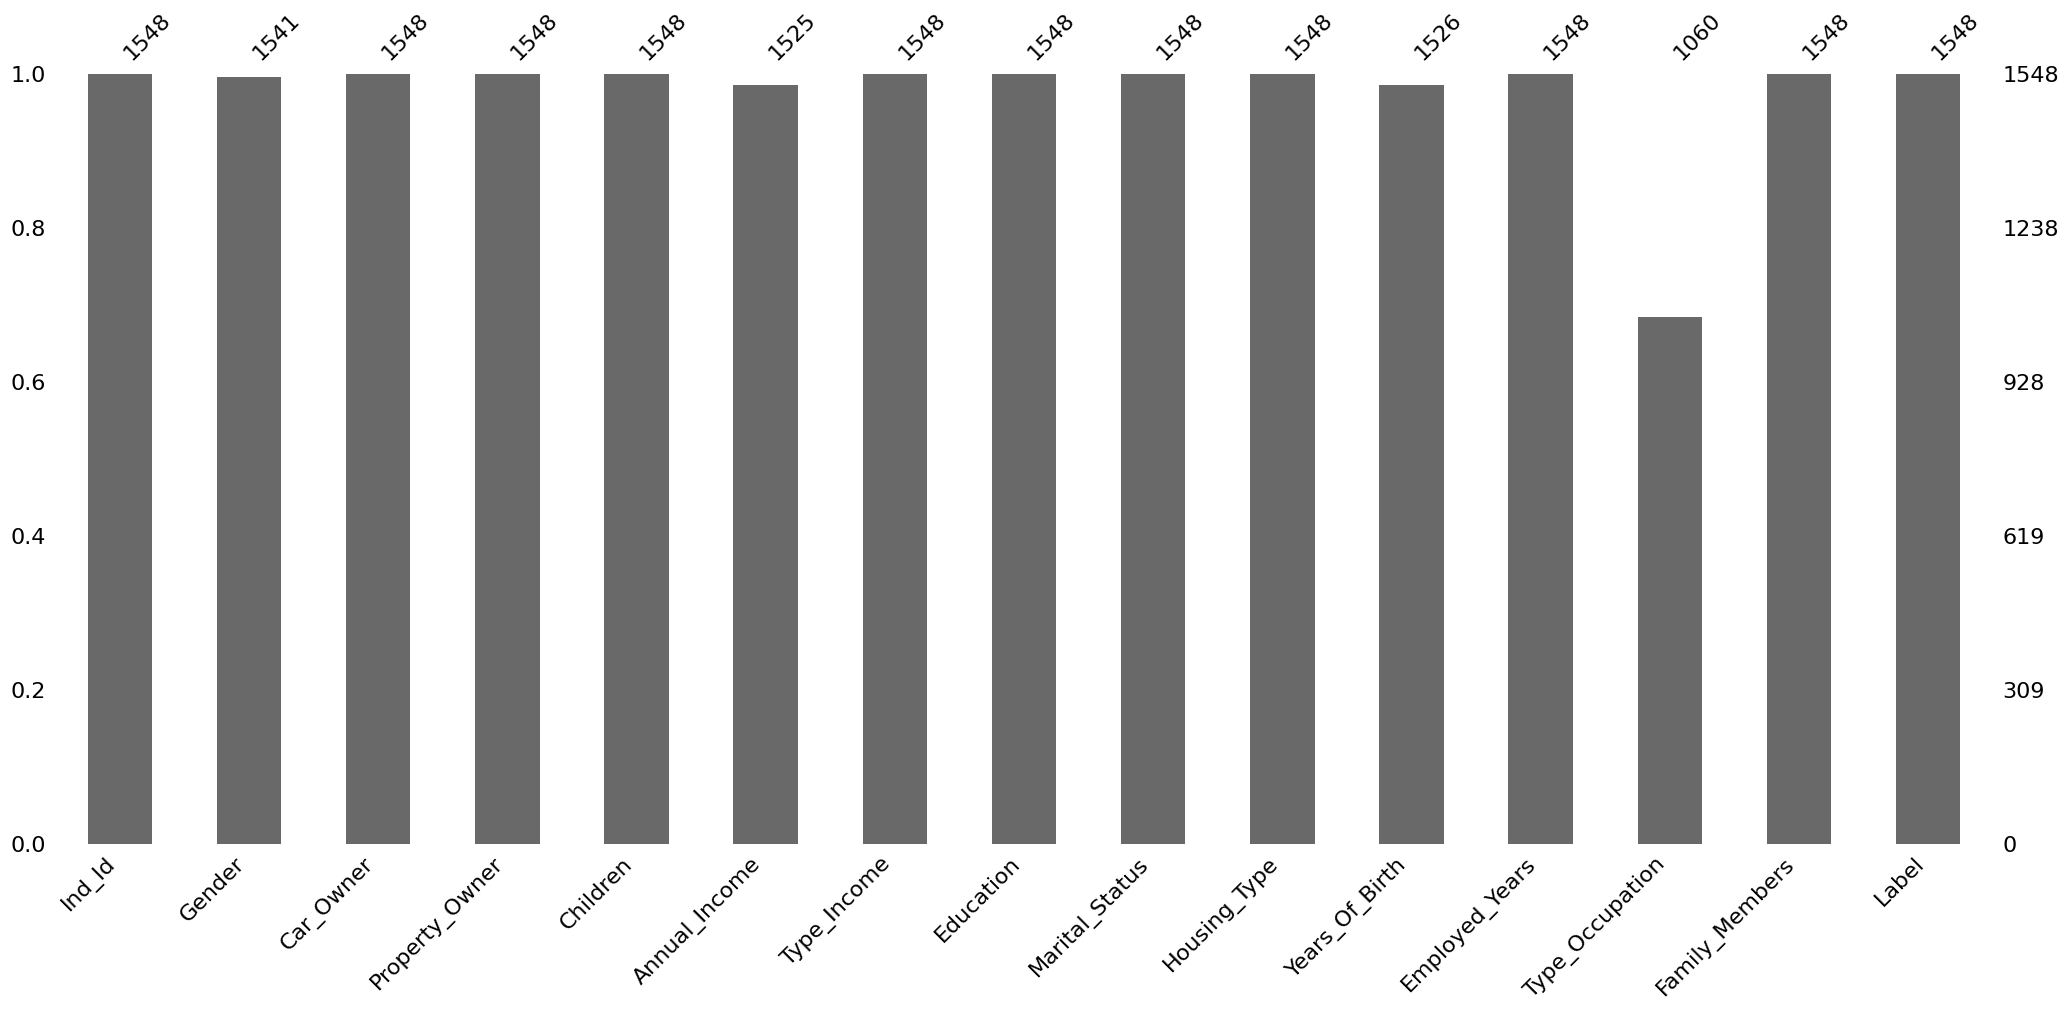

In [ ]:
# Visualization of missing values
msno.bar(credit_card_mv)
plt.show()

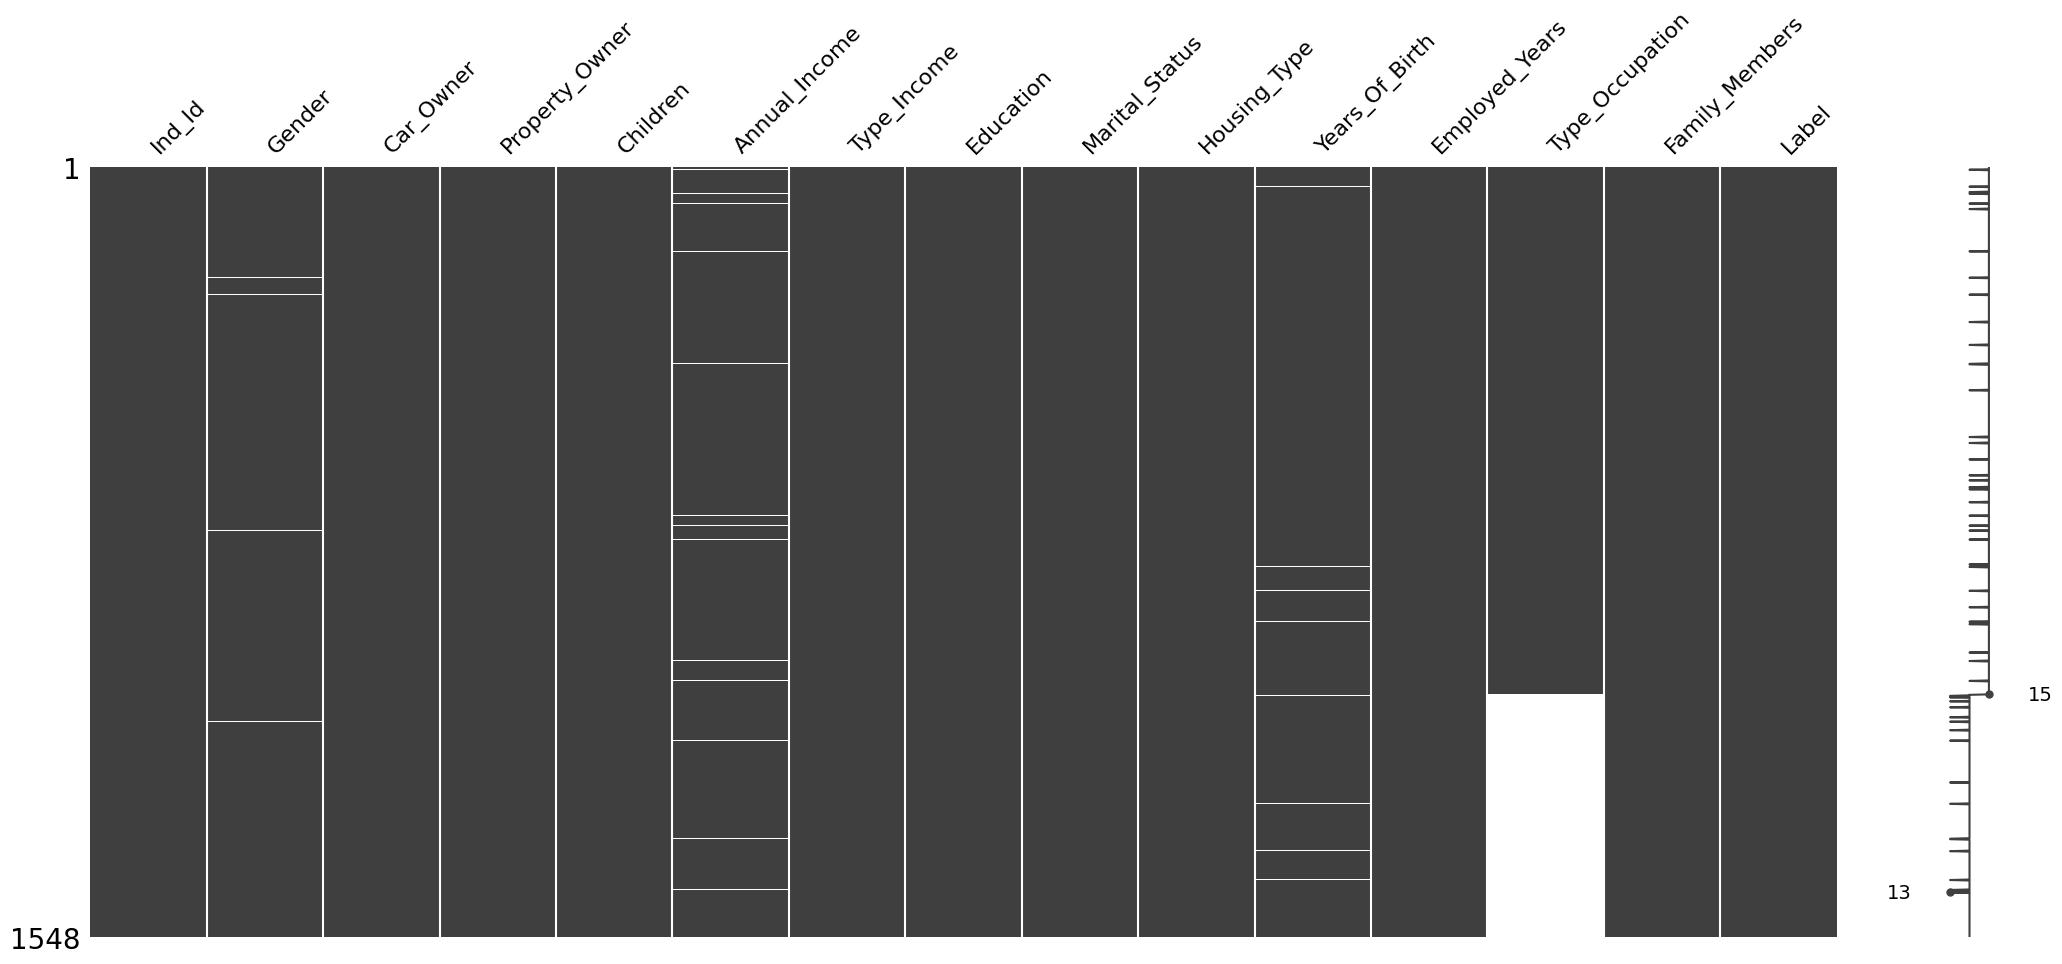

In [ ]:
msno.matrix(credit_card_mv.sort_values(by = 'Type_Occupation'))
plt.show()

**IMPUTATION TECHNIQUE**

In [ ]:
# Filling missing values in Type_Occupation as Not_Known
credit_card_mv['Type_Occupation'] = credit_card_mv['Type_Occupation'].fillna('Not_Known')

**REMOVAL OF MISSING VALUE**

In [ ]:
# Dropping remaining missing values from credit_card_mv df
credit_card_mv = credit_card_mv.dropna()

In [ ]:
# Copying credit_card_mv df into credit_card_out df and finding the count of missing values in credit_card_out df
credit_card_out = credit_card_mv.copy()
credit_card_out.isnull().sum()

Ind_Id             0
Gender             0
Car_Owner          0
Property_Owner     0
Children           0
Annual_Income      0
Type_Income        0
Education          0
Marital_Status     0
Housing_Type       0
Years_Of_Birth     0
Employed_Years     0
Type_Occupation    0
Family_Members     0
Label              0
dtype: int64

**OUTLIER TREATMENT**

In [ ]:
# Checking top 5 rows
credit_card_out.head()

,Ind_Id,Gender,Car_Owner,Property_Owner,Children,Annual_Income,Type_Income,Education,Marital_Status,Housing_Type,Years_Of_Birth,Employed_Years,Type_Occupation,Family_Members,Label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.43,1000.67,Not_Known,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.14,-1.61,Not_Known,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.14,-1.61,Not_Known,2,1
6,5009754,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.14,-1.61,Not_Known,2,1
7,5009894,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,60.64,1000.67,Not_Known,2,1


In [ ]:
# Taking Ind_Id, Label column from credit_card_out and forming new df credit_card_outlabel
credit_card_outlabel = credit_card_out[['Ind_Id','Label']]

In [ ]:
# Checking top 5 rows
credit_card_outlabel.head()

,Ind_Id,Label
0,5008827,1
1,5009744,1
4,5009752,1
6,5009754,1
7,5009894,1


In [ ]:
# Dropping Label column from credit_card_out
credit_card_out = credit_card_out.drop(columns = ['Label'])

In [ ]:
# Checking top 5 rows
credit_card_out.head()

,Ind_Id,Gender,Car_Owner,Property_Owner,Children,Annual_Income,Type_Income,Education,Marital_Status,Housing_Type,Years_Of_Birth,Employed_Years,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.43,1000.67,Not_Known,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.14,-1.61,Not_Known,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.14,-1.61,Not_Known,2
6,5009754,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.14,-1.61,Not_Known,2
7,5009894,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,60.64,1000.67,Not_Known,2


In [ ]:
# Defining remove_outliers function to remove outliers
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_out = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_out

In [ ]:
# Removing outliers from credit_card_out
credit_card_outcln = remove_outliers(credit_card_out)

<ipython-input-17-5c8f154faa02>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-17-5c8f154faa02>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-17-5c8f154faa02>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_out = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [ ]:
# Basic information of credit_card_outcln
credit_card_outcln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1093 entries, 1 to 1547
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_Id           1093 non-null   int64  
 1   Gender           1093 non-null   object 
 2   Car_Owner        1093 non-null   object 
 3   Property_Owner   1093 non-null   object 
 4   Children         1093 non-null   int64  
 5   Annual_Income    1093 non-null   float64
 6   Type_Income      1093 non-null   object 
 7   Education        1093 non-null   object 
 8   Marital_Status   1093 non-null   object 
 9   Housing_Type     1093 non-null   object 
 10  Years_Of_Birth   1093 non-null   float64
 11  Employed_Years   1093 non-null   float64
 12  Type_Occupation  1093 non-null   object 
 13  Family_Members   1093 non-null   int64  
dtypes: float64(3), int64(3), object(8)
memory usage: 128.1+ KB


In [ ]:
# Merging credit_card_outcln and credit_card_outlabel
credit_card_clean = pd.merge(credit_card_outcln, credit_card_outlabel, on = 'Ind_Id', how = 'inner')
credit_card_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1093 entries, 0 to 1092
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_Id           1093 non-null   int64  
 1   Gender           1093 non-null   object 
 2   Car_Owner        1093 non-null   object 
 3   Property_Owner   1093 non-null   object 
 4   Children         1093 non-null   int64  
 5   Annual_Income    1093 non-null   float64
 6   Type_Income      1093 non-null   object 
 7   Education        1093 non-null   object 
 8   Marital_Status   1093 non-null   object 
 9   Housing_Type     1093 non-null   object 
 10  Years_Of_Birth   1093 non-null   float64
 11  Employed_Years   1093 non-null   float64
 12  Type_Occupation  1093 non-null   object 
 13  Family_Members   1093 non-null   int64  
 14  Label            1093 non-null   int64  
dtypes: float64(3), int64(4), object(8)
memory usage: 136.6+ KB


In [ ]:
# Label column's value count of credit_card_clean df
credit_card_clean['Label'].value_counts()

0    985
1    108
Name: Label, dtype: int64

### **CONVERTING credit_card_clean DATAFRAME INTO CSV FILE FOR MYSQL ANALYSIS**

In [ ]:
# Converting df to csv file
credit_card_clean.to_csv('credit_card_clean.csv')

### **DEALING WITH CATEGORICAL VARIABLES AND COLUMNS DATATYPES**

In [ ]:
# Copying credit_card_clean df into credit_card_encoding
credit_card_encoding = credit_card_clean.copy()

In [ ]:
# Checking top 5 rows
credit_card_encoding.head()

,Ind_Id,Gender,Car_Owner,Property_Owner,Children,Annual_Income,Type_Income,Education,Marital_Status,Housing_Type,Years_Of_Birth,Employed_Years,Type_Occupation,Family_Members,Label
0,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.14,-1.61,Not_Known,2,1
1,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.14,-1.61,Not_Known,2,1
2,5009754,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.14,-1.61,Not_Known,2,1
3,5018498,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,51.92,-2.75,Cooking staff,2,1
4,5018503,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,51.92,-2.75,Cooking staff,2,1


In [ ]:
# Dummy encoding the columns
dummy_columns = ['Gender','Type_Income','Marital_Status','Housing_Type']
cc_dummy = pd.get_dummies(credit_card_encoding, columns = dummy_columns , drop_first = True)
cc_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1093 entries, 0 to 1092
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Ind_Id                               1093 non-null   int64  
 1   Car_Owner                            1093 non-null   object 
 2   Property_Owner                       1093 non-null   object 
 3   Children                             1093 non-null   int64  
 4   Annual_Income                        1093 non-null   float64
 5   Education                            1093 non-null   object 
 6   Years_Of_Birth                       1093 non-null   float64
 7   Employed_Years                       1093 non-null   float64
 8   Type_Occupation                      1093 non-null   object 
 9   Family_Members                       1093 non-null   int64  
 10  Label                                1093 non-null   int64  
 11  Gender_M                      

In [ ]:
cc_dummy.head()

,Ind_Id,Car_Owner,Property_Owner,Children,Annual_Income,Education,Years_Of_Birth,Employed_Years,Type_Occupation,Family_Members,...,Type_Income_Working,Marital_Status_Married,Marital_Status_Separated,Marital_Status_Single / not married,Marital_Status_Widow,Housing_Type_House / apartment,Housing_Type_Municipal apartment,Housing_Type_Office apartment,Housing_Type_Rented apartment,Housing_Type_With parents
0,5009744,Y,N,0,315000.0,Higher education,37.14,-1.61,Not_Known,2,...,0,1,0,0,0,1,0,0,0,0
1,5009752,Y,N,0,315000.0,Higher education,37.14,-1.61,Not_Known,2,...,0,1,0,0,0,1,0,0,0,0
2,5009754,Y,N,0,315000.0,Higher education,37.14,-1.61,Not_Known,2,...,0,1,0,0,0,1,0,0,0,0
3,5018498,Y,Y,0,90000.0,Secondary / secondary special,51.92,-2.75,Cooking staff,2,...,1,1,0,0,0,1,0,0,0,0
4,5018503,Y,Y,0,90000.0,Secondary / secondary special,51.92,-2.75,Cooking staff,2,...,1,1,0,0,0,1,0,0,0,0


In [ ]:
# Ordinal encoding the columns
cc_dummy['Car_Owner'] = cc_dummy['Car_Owner'].map({'N':0,'Y':1}).astype('int')
cc_dummy['Property_Owner'] = cc_dummy['Property_Owner'].map({'N':0,'Y':1}).astype('int')
cc_dummy['Education'] = cc_dummy['Education'].map({'Lower secondary':0, 'Secondary / secondary special':1, 'Incomplete higher':2, 'Higher education':3, 'Academic degree':4}).astype('int')

In [ ]:
cc_dummy.head()

,Ind_Id,Car_Owner,Property_Owner,Children,Annual_Income,Education,Years_Of_Birth,Employed_Years,Type_Occupation,Family_Members,...,Type_Income_Working,Marital_Status_Married,Marital_Status_Separated,Marital_Status_Single / not married,Marital_Status_Widow,Housing_Type_House / apartment,Housing_Type_Municipal apartment,Housing_Type_Office apartment,Housing_Type_Rented apartment,Housing_Type_With parents
0,5009744,1,0,0,315000.0,3,37.14,-1.61,Not_Known,2,...,0,1,0,0,0,1,0,0,0,0
1,5009752,1,0,0,315000.0,3,37.14,-1.61,Not_Known,2,...,0,1,0,0,0,1,0,0,0,0
2,5009754,1,0,0,315000.0,3,37.14,-1.61,Not_Known,2,...,0,1,0,0,0,1,0,0,0,0
3,5018498,1,1,0,90000.0,1,51.92,-2.75,Cooking staff,2,...,1,1,0,0,0,1,0,0,0,0
4,5018503,1,1,0,90000.0,1,51.92,-2.75,Cooking staff,2,...,1,1,0,0,0,1,0,0,0,0


In [ ]:
# Binary encoding
bin_columns = ['Type_Occupation']

# Initializing the BinaryEncoder
encoder = ce.BinaryEncoder(cols=bin_columns)

# Fitting and transforming the encoder
cc_encoded = encoder.fit_transform(cc_dummy)

# Printing the resulting DataFrame
cc_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1093 entries, 0 to 1092
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Ind_Id                               1093 non-null   int64  
 1   Car_Owner                            1093 non-null   int64  
 2   Property_Owner                       1093 non-null   int64  
 3   Children                             1093 non-null   int64  
 4   Annual_Income                        1093 non-null   float64
 5   Education                            1093 non-null   int64  
 6   Years_Of_Birth                       1093 non-null   float64
 7   Employed_Years                       1093 non-null   float64
 8   Type_Occupation_0                    1093 non-null   int64  
 9   Type_Occupation_1                    1093 non-null   int64  
 10  Type_Occupation_2                    1093 non-null   int64  
 11  Type_Occupation_3             

In [ ]:
cc_encoded.head()

,Ind_Id,Car_Owner,Property_Owner,Children,Annual_Income,Education,Years_Of_Birth,Employed_Years,Type_Occupation_0,Type_Occupation_1,...,Type_Income_Working,Marital_Status_Married,Marital_Status_Separated,Marital_Status_Single / not married,Marital_Status_Widow,Housing_Type_House / apartment,Housing_Type_Municipal apartment,Housing_Type_Office apartment,Housing_Type_Rented apartment,Housing_Type_With parents
0,5009744,1,0,0,315000.0,3,37.14,-1.61,0,0,...,0,1,0,0,0,1,0,0,0,0
1,5009752,1,0,0,315000.0,3,37.14,-1.61,0,0,...,0,1,0,0,0,1,0,0,0,0
2,5009754,1,0,0,315000.0,3,37.14,-1.61,0,0,...,0,1,0,0,0,1,0,0,0,0
3,5018498,1,1,0,90000.0,1,51.92,-2.75,0,0,...,1,1,0,0,0,1,0,0,0,0
4,5018503,1,1,0,90000.0,1,51.92,-2.75,0,0,...,1,1,0,0,0,1,0,0,0,0


**DATA TYPE CONVERSION**

In [ ]:
# Selecting the column names from cc_encoded df
cc_encoded.columns

Index(['Ind_Id', 'Car_Owner', 'Property_Owner', 'Children', 'Annual_Income',
       'Education', 'Years_Of_Birth', 'Employed_Years', 'Type_Occupation_0',
       'Type_Occupation_1', 'Type_Occupation_2', 'Type_Occupation_3',
       'Type_Occupation_4', 'Family_Members', 'Label', 'Gender_M',
       'Type_Income_Pensioner', 'Type_Income_State servant',
       'Type_Income_Working', 'Marital_Status_Married',
       'Marital_Status_Separated', 'Marital_Status_Single / not married',
       'Marital_Status_Widow', 'Housing_Type_House / apartment',
       'Housing_Type_Municipal apartment', 'Housing_Type_Office apartment',
       'Housing_Type_Rented apartment', 'Housing_Type_With parents'],
      dtype='object')

In [ ]:
# Selecting columns needed to convert into int64 datatype
datatype_conv = ['Gender_M',
       'Type_Income_Pensioner', 'Type_Income_State servant',
       'Type_Income_Working', 'Marital_Status_Married',
       'Marital_Status_Separated', 'Marital_Status_Single / not married',
       'Marital_Status_Widow', 'Housing_Type_House / apartment',
       'Housing_Type_Municipal apartment', 'Housing_Type_Office apartment',
       'Housing_Type_Rented apartment', 'Housing_Type_With parents']

In [ ]:
# Converting columns into int64 datatype
cc_encoded[datatype_conv] = cc_encoded[datatype_conv].astype('int64')
cc_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1093 entries, 0 to 1092
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Ind_Id                               1093 non-null   int64  
 1   Car_Owner                            1093 non-null   int64  
 2   Property_Owner                       1093 non-null   int64  
 3   Children                             1093 non-null   int64  
 4   Annual_Income                        1093 non-null   float64
 5   Education                            1093 non-null   int64  
 6   Years_Of_Birth                       1093 non-null   float64
 7   Employed_Years                       1093 non-null   float64
 8   Type_Occupation_0                    1093 non-null   int64  
 9   Type_Occupation_1                    1093 non-null   int64  
 10  Type_Occupation_2                    1093 non-null   int64  
 11  Type_Occupation_3             

**DATA ANALYSIS SUMMARY** :

**Question and Answers**
1. **What approach are you going to take in order to prove or disprove your hypothesis?**
> **Ans** : Have performed **Data visualization** to find the relationship between features and label and inference have been reported above. Future, in ML will perform **feature selection** to find most important features.

2. **What feature engineering techniques will be relevant to your project?**
> **Ans** : Initially, **deleted unwanted columns** such as 'Mobile_Phone', 'Work_Phone', 'Phone', 'Email_Id' as they are not important for our analysis. Then, have used **constant imputation technique** for 'Type_Occupation' column and remaining column **missing values were dropped**. Then, **Outliers were removed** and then **encoded categorical columns** using **dummy encoding** ('Gender','Type_Income','Marital_Status','Housing_Type'), **ordinal encoding** ('Car_Owner', 'Property_Owner', 'Education') and **binary encoding** ('Type_Occupation'). Finally, **datatype** of certain uint8 columns **were converted** to int64.


3. **Please justify your data analysis approach.**
> Have performed following steps in data analysis to make the data clean for ML model to predict.
    1. **Data visualization** using various charts.
    2. **Data cleaning** involving imputation, removing missing values, outlier removal.
    3. **Encoding categorical variables**.


4. **Identify important patterns in your data using the EDA approach to justify your findings.**
> Have found important pattern the person who is **Female owning car and property, having less no. of children, working as state servant, who has acedemic degree, who is civil married, living with parents, earning high annual income, age between 30 to 45 and having lesser no. of family member together have the highest chance of loan approval rate**.



## **SECTION 4: MACHINE LEARNING SECTION**

### **SPLITTING THE DATASET INTO FEATURES AND TARGET**

In [ ]:
# Splitting feature columns as X and Label column as y variables
X = cc_encoded.drop(['Ind_Id','Label'], axis = 1)
y = cc_encoded['Label']

### **STANDARDIZATION**

In [ ]:
# Standardization of numerical columns
ss_col = ['Annual_Income', 'Years_Of_Birth', 'Employed_Years']
scaler = StandardScaler()
X[ss_col] = scaler.fit_transform(X[ss_col])

In [ ]:
X

,Car_Owner,Property_Owner,Children,Annual_Income,Education,Years_Of_Birth,Employed_Years,Type_Occupation_0,Type_Occupation_1,Type_Occupation_2,...,Type_Income_Working,Marital_Status_Married,Marital_Status_Separated,Marital_Status_Single / not married,Marital_Status_Widow,Housing_Type_House / apartment,Housing_Type_Municipal apartment,Housing_Type_Office apartment,Housing_Type_Rented apartment,Housing_Type_With parents
0,1,0,0,1.858748,3,-0.308002,0.978539,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,1,0,0,1.858748,3,-0.308002,0.978539,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,1,0,0,1.858748,3,-0.308002,0.978539,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,1,1,0,-1.255216,1,1.247040,0.736577,0,0,0,...,1,1,0,0,0,1,0,0,0,0
4,1,1,0,-1.255216,1,1.247040,0.736577,0,0,0,...,1,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,1,0,1,2.481541,1,-0.960321,-0.736414,0,0,1,...,0,1,0,0,0,1,0,0,0,0
1089,0,0,0,0.613162,2,-1.267541,0.617719,0,0,1,...,0,0,0,1,0,1,0,0,0,0
1090,1,1,2,-0.009631,3,-0.418476,-0.120899,0,1,0,...,1,1,0,0,0,1,0,0,0,0
1091,1,0,0,1.235955,1,0.192810,0.944579,0,0,1,...,1,0,0,0,0,1,0,0,0,0


### **SPLITTING THE DATASET AS TRAINING AND TESTING SETS**

In [ ]:
# Splitting into train and test df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### **BALANCING THE DATASET**

In [ ]:
# Balancing the training df
smote = SMOTE(random_state = 42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [ ]:
X_train_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1588 entries, 0 to 1587
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Car_Owner                            1588 non-null   int64  
 1   Property_Owner                       1588 non-null   int64  
 2   Children                             1588 non-null   int64  
 3   Annual_Income                        1588 non-null   float64
 4   Education                            1588 non-null   int64  
 5   Years_Of_Birth                       1588 non-null   float64
 6   Employed_Years                       1588 non-null   float64
 7   Type_Occupation_0                    1588 non-null   int64  
 8   Type_Occupation_1                    1588 non-null   int64  
 9   Type_Occupation_2                    1588 non-null   int64  
 10  Type_Occupation_3                    1588 non-null   int64  
 11  Type_Occupation_4             

In [ ]:
y_train_balanced.value_counts()

1    794
0    794
Name: Label, dtype: int64

**Explanation** : After using **SMOTE Technique**, we have balanced the Label(Output) column both **approved and rejected as 794 records** each for ML algorithms to work efficiently.

### **FEATURE SELECTION**

In [ ]:
# Selecting best features
selector = SelectKBest(score_func = mutual_info_classif, k = 20)
X_train_selected = selector.fit_transform(X_train_balanced, y_train_balanced)
X_test_selected = selector.transform(X_test)

In [ ]:
# Best features names
selected_feature_name = X.columns[selector.get_support()]
selected_feature_name

Index(['Car_Owner', 'Children', 'Annual_Income', 'Education', 'Years_Of_Birth',
       'Employed_Years', 'Type_Occupation_0', 'Type_Occupation_1',
       'Type_Occupation_2', 'Type_Occupation_4', 'Family_Members', 'Gender_M',
       'Type_Income_State servant', 'Type_Income_Working',
       'Marital_Status_Separated', 'Marital_Status_Single / not married',
       'Housing_Type_House / apartment', 'Housing_Type_Office apartment',
       'Housing_Type_Rented apartment', 'Housing_Type_With parents'],
      dtype='object')

**Explanation** : Have selected top 20 features as input to ML models.

### **MODEL TRAINING AND EVALUATION**

**Model Selection** : As it is classification problem choosing **Logistic Regression, Decision Tree, Random Forest, Support Vector Machine, K-Nearest Neighbors, XGBoost algorithms** to find which model have better accuracy.

In [ ]:
# Defining multiple classification models
models = {
    'Logistic Regression': LogisticRegression(random_state = 42),
    'Decision Tree': DecisionTreeClassifier(random_state = 42),
    'Random Forest': RandomForestClassifier(random_state = 42),
    'Support Vector Machine': SVC(probability=True, random_state = 42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost' : xgb.XGBClassifier(random_state = 42)
}

In [ ]:
# Training multiple classification models
for model_name, model in models.items():
    print(f'Training {model_name} :')

    # Fitting the model on the training data
    model.fit(X_train_selected, y_train_balanced)

    # Cross-validation
    cv_scores = cross_val_score(model, X_train_selected, y_train_balanced, cv=5, scoring='accuracy')

    # Making predictions
    y_pred = model.predict(X_test_selected)

    # Evaluating the model
    print(f'Model: {model_name}')
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
    print('Classification Report:\n', classification_report(y_test, y_pred))
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print("Cross-Validation Scores:", cv_scores)
    print("Mean CV Accuracy:", np.mean(cv_scores))
    print('\n')

Training Logistic Regression :
Model: Logistic Regression
Confusion Matrix:
 [[125  66]
 [ 18  10]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.65      0.75       191
           1       0.13      0.36      0.19        28

    accuracy                           0.62       219
   macro avg       0.50      0.51      0.47       219
weighted avg       0.78      0.62      0.68       219

Accuracy: 0.6164383561643836
Cross-Validation Scores: [0.63207547 0.73584906 0.74528302 0.76025237 0.78233438]
Mean CV Accuracy: 0.7311588595916909


Training Decision Tree :
Model: Decision Tree
Confusion Matrix:
 [[157  34]
 [ 13  15]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.82      0.87       191
           1       0.31      0.54      0.39        28

    accuracy                           0.79       219
   macro avg       0.61      0.68      0.63       219
weighted avg   

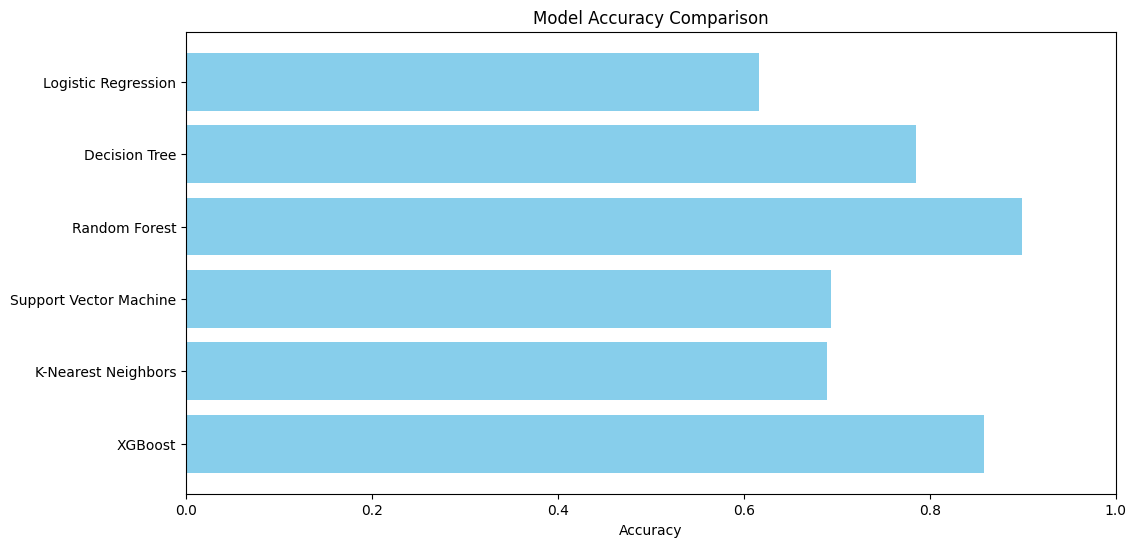

In [ ]:
# Names of the models
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector Machine', 'K-Nearest Neighbors', 'XGBoost']

# Accuracy scores of the models
accuracy_scores = [accuracy_score(y_test, model.predict(X_test_selected)) for model in models.values()]

# Creating a bar plot
plt.figure(figsize=(12, 6))
plt.barh(model_names, accuracy_scores, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlim(0.0, 1.0)  # Set the x-axis limits
plt.gca().invert_yaxis()
plt.show()

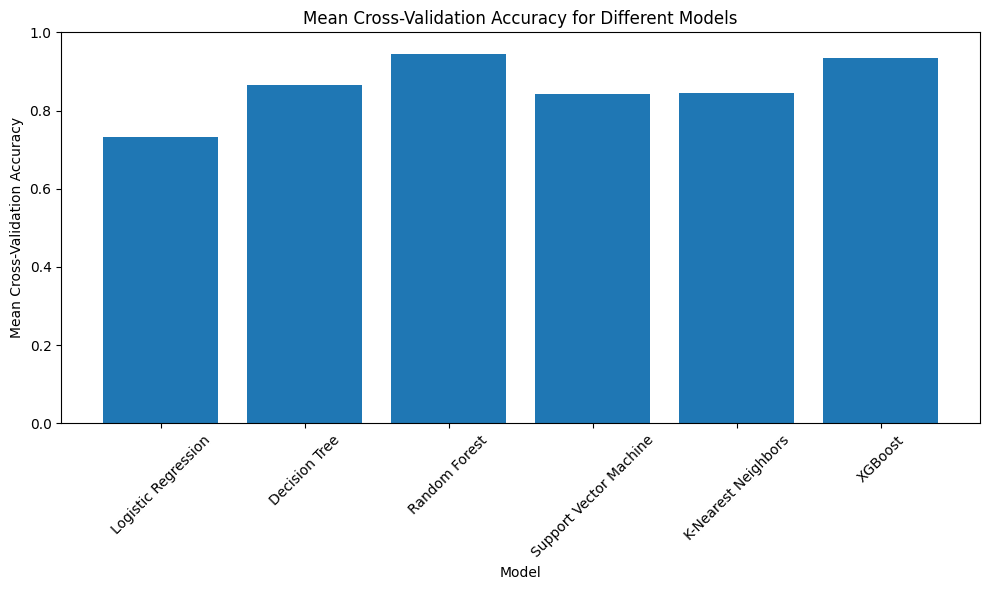

In [ ]:
# Mean cross-validation scores for different models
mean_cv_scores = {}
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train_selected, y_train_balanced, cv=5, scoring='accuracy')
    mean_cv_scores[model_name] = np.mean(cv_scores)

# Creating a bar chart for mean cross-validation scores
plt.figure(figsize=(10, 6))
plt.bar(mean_cv_scores.keys(), mean_cv_scores.values())
plt.xlabel('Model')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.title('Mean Cross-Validation Accuracy for Different Models')
plt.ylim([0.0, 1.0])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Training Logistic Regression :


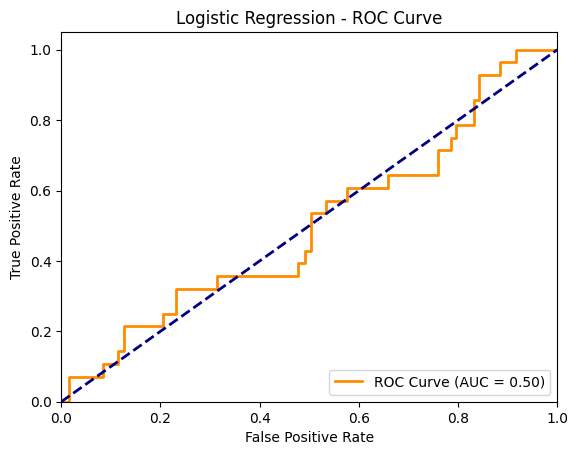

Training Decision Tree :


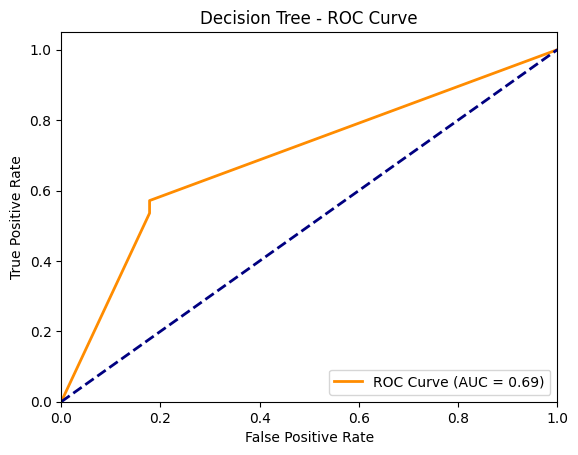

Training Random Forest :


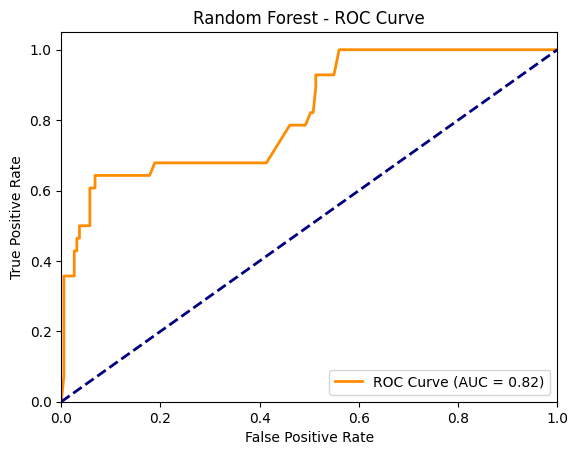

Training Support Vector Machine :


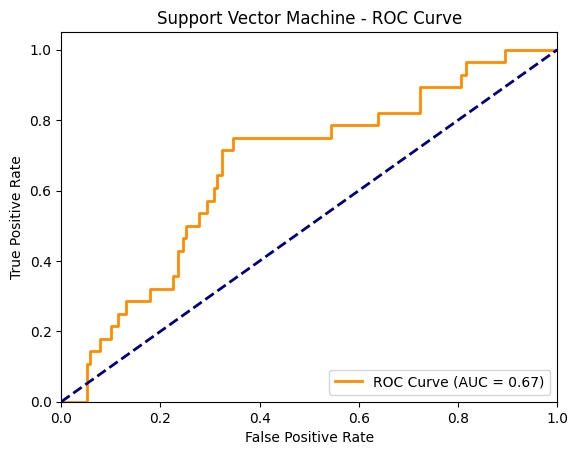

Training K-Nearest Neighbors :


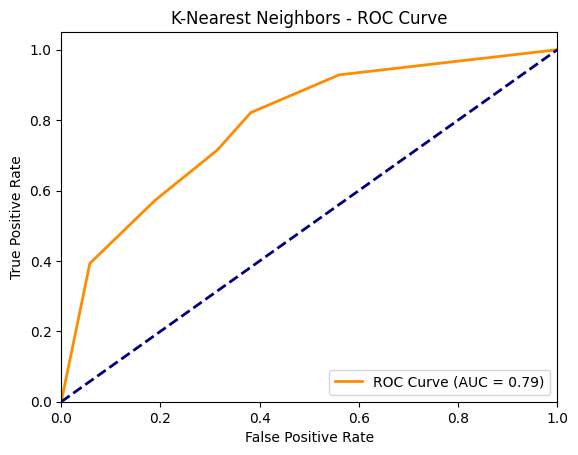

Training XGBoost :


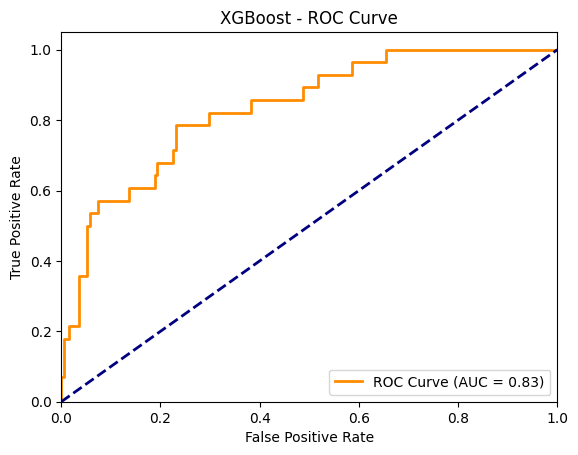

In [ ]:
# ROC and AUC graphs for different classification models
for model_name, model in models.items():
    print(f'Training {model_name} :')

    # Fitting the model on the training data
    model.fit(X_train_selected, y_train_balanced)

    # Making predictions
    y_pred = model.predict(X_test_selected)

    # ROC curve and AUC
    y_pred_prob = model.predict_proba(X_test_selected)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Plotting the curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

**Inference** : The top 2 algorithms which has best Mean CV Accuracy with scores, ROC and AUC are mentioned below.
1.   **Random Forest** with Mean CV Accuracy: **0.945219530583497**, **ROC(AUC = 0.82)**.
2.   **XGBoost** with Mean CV Accuracy: **0.9338888558220741**, **ROC(AUC = 0.83)**.



### **HYPER PARAMETER TUNING**

In [ ]:
# Defining the hyperparameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Creating the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initializing GridSearchCV
rf_grid_search = GridSearchCV(estimator=rf_classifier, param_grid=rf_param_grid, cv=5, scoring='accuracy')

# Performing Grid Search to find the best hyperparameters
rf_grid_search.fit(X_train_selected, y_train_balanced)

# Getting the best hyperparameters and the corresponding accuracy score
best_rf_params = rf_grid_search.best_params_
best_rf_accuracy = rf_grid_search.best_score_

print("Best Random Forest Hyperparameters:", best_rf_params)
print("Best Random Forest Cross-Validation Accuracy:", best_rf_accuracy)


Best Random Forest Hyperparameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Random Forest Cross-Validation Accuracy: 0.9546634128920898


In [ ]:
# Defining the hyperparameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Creating the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Initializing GridSearchCV
xgb_grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=xgb_param_grid, cv=5, scoring='accuracy')

# Performing Grid Search to find the best hyperparameters
xgb_grid_search.fit(X_train_selected, y_train_balanced)

# Getting the best hyperparameters and the corresponding accuracy score
best_xgb_params = xgb_grid_search.best_params_
best_xgb_accuracy = xgb_grid_search.best_score_

print("Best XGBoost Hyperparameters:", best_xgb_params)
print("Best XGBoost Cross-Validation Accuracy:", best_xgb_accuracy)


Best XGBoost Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Best XGBoost Cross-Validation Accuracy: 0.9427077753308334


**Inference** :

1.   Among Random forest classifier and XGBoost classifier, **Random Forest classifier** have **Best Cross-Validation Accuracy: 0.9546634128920898**.
2.   **Best Random Forest Hyperparameters**: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}.
3. Hence, Choosing **Random forest classifier as our BEST MODEL**.



### **BEST MODEL**

Accuracy: 0.8995433789954338
Precision: 0.6071428571428571
Recall: 0.6071428571428571
F1-Score: 0.6071428571428571
ROC AUC Score: 0.8115183246073299
Confusion Matrix:
[[180  11]
 [ 11  17]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       191
           1       0.61      0.61      0.61        28

    accuracy                           0.90       219
   macro avg       0.77      0.77      0.77       219
weighted avg       0.90      0.90      0.90       219



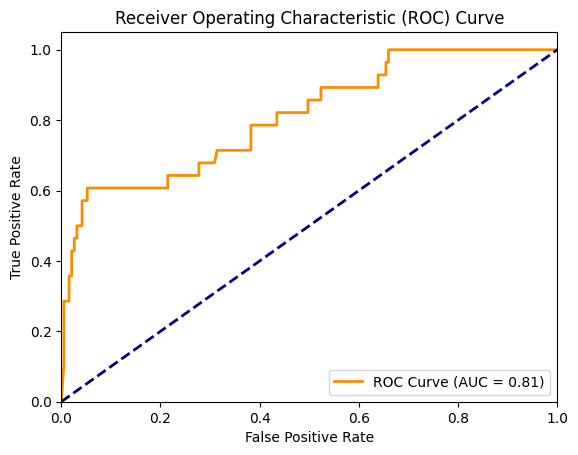

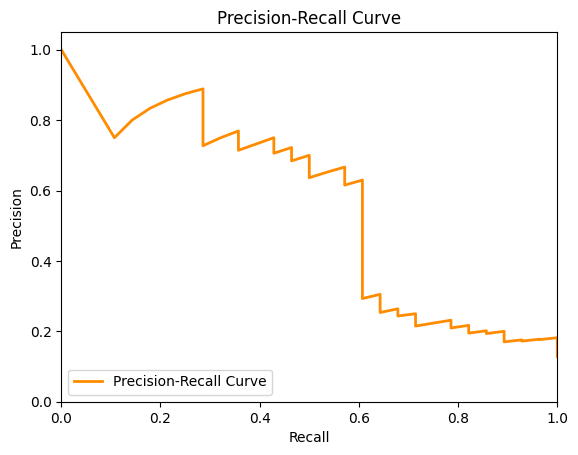

Cross-Validation Scores: [0.91194969 0.97484277 0.97169811 0.95583596 0.95899054]
Mean CV Accuracy: 0.9546634128920898


In [ ]:
# Creating the Random Forest classifier with the best hyperparameters
best_rf_classifier = RandomForestClassifier(bootstrap = False, max_depth = None, min_samples_leaf = 1, min_samples_split= 5, n_estimators= 200, random_state=42)

# Fitting the best model on the training data
best_rf_classifier.fit(X_train_selected, y_train_balanced)

# Making predictions on the test data
y_pred = best_rf_classifier.predict(X_test_selected)

# Evaluating the Model

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# F1-score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, best_rf_classifier.predict_proba(X_test_selected)[:, 1])
print("ROC AUC Score:", roc_auc)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# ROC Curve
y_pred_prob = best_rf_classifier.predict_proba(X_test_selected)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# Cross-Validation
cv_scores = cross_val_score(best_rf_classifier, X_train_selected, y_train_balanced, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))


In [ ]:
# Cross-Validation
cv_accuracy = cross_val_score(best_rf_classifier, X_train_selected, y_train_balanced, cv=5, scoring='accuracy')
print("Mean CV Accuracy:", np.mean(cv_accuracy))

cv_precision = cross_val_score(best_rf_classifier, X_train_selected, y_train_balanced, cv=5, scoring='precision')
print("Mean CV Precision:", np.mean(cv_precision))

cv_recall = cross_val_score(best_rf_classifier, X_train_selected, y_train_balanced, cv=5, scoring='recall')
print("Mean CV Recall:", np.mean(cv_recall))

cv_f1 = cross_val_score(best_rf_classifier, X_train_selected, y_train_balanced, cv=5, scoring='f1')
print("Mean CV f1 score:", np.mean(cv_f1))

Mean CV Accuracy: 0.9546634128920898
Mean CV Precision: 0.9525162669161359
Mean CV Recall: 0.9572008598041556
Mean CV f1 score: 0.954278724511467


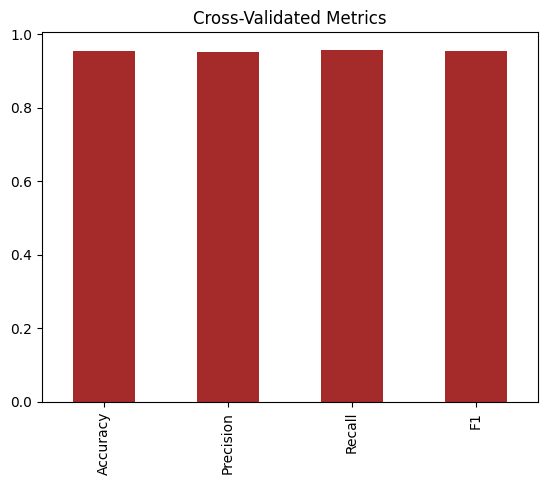

In [ ]:
# Plotting Cross validated Metrics graph
cv_metrics = pd.DataFrame({"Accuracy": np.mean(cv_accuracy), "Precision": np.mean(cv_precision), "Recall": np.mean(cv_recall), "F1": np.mean(cv_f1)}, index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False, color ='Brown')
plt.show()

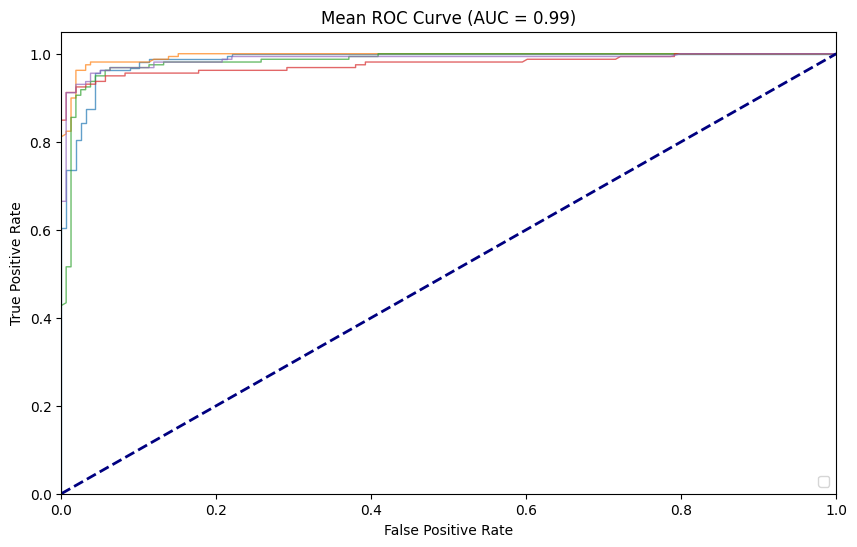

Mean Average Precision: 0.99


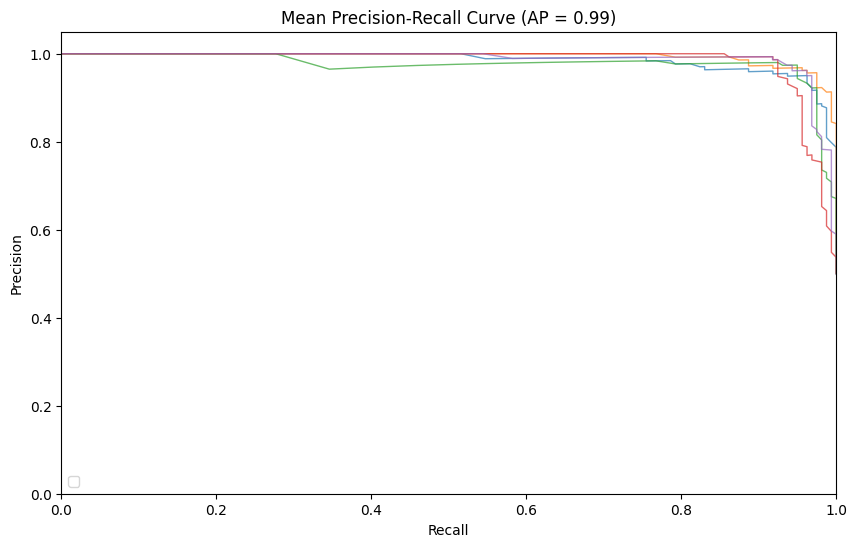

In [ ]:
# Performing cross-validation and computing evaluation scores
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store ROC and PR curve data
roc_auc_scores = []
average_precision_scores = []

# Initializing plot for ROC curve
plt.figure(figsize=(10, 6))

# Performing cross-validation and evaluating the model
for train_idx, val_idx in cv.split(X_train_selected, y_train_balanced):
    X_train_fold, X_val_fold = X_train_selected[train_idx], X_train_selected[val_idx]
    y_train_fold, y_val_fold = y_train_balanced[train_idx], y_train_balanced[val_idx]

    # Fitting the model
    model = best_rf_classifier.fit(X_train_fold, y_train_fold)

    # Predicting probabilities on the validation set
    y_pred_prob = model.predict_proba(X_val_fold)[:, 1]

    # Calculating ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_val_fold, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    roc_auc_scores.append(roc_auc)

    # Calculating Precision-Recall curve and average precision
    precision, recall, _ = precision_recall_curve(y_val_fold, y_pred_prob)
    avg_precision = average_precision_score(y_val_fold, y_pred_prob)
    average_precision_scores.append(avg_precision)

    # Plotting ROC curve
    plt.plot(fpr, tpr, lw=1, alpha=0.7)

# Calculating mean ROC AUC and mean average precision
mean_roc_auc = np.mean(roc_auc_scores)
mean_avg_precision = np.mean(average_precision_scores)

# Plotting ROC curve with mean AUC score
plt.plot([0, 1], [0, 1], linestyle='--', color='navy', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Mean ROC Curve (AUC = {mean_roc_auc:.2f})')
plt.legend(loc='lower right')
plt.show()

# Printing mean average precision
print(f"Mean Average Precision: {mean_avg_precision:.2f}")

# Initializing plot for Precision-Recall curve
plt.figure(figsize=(10, 6))

# Plotting Precision-Recall curve
for train_idx, val_idx in cv.split(X_train_selected, y_train_balanced):
    X_train_fold, X_val_fold = X_train_selected[train_idx], X_train_selected[val_idx]
    y_train_fold, y_val_fold = y_train_balanced[train_idx], y_train_balanced[val_idx]

    # Fitting the model
    model = rf_classifier.fit(X_train_fold, y_train_fold)

    # Predicting probabilities on the validation set
    y_pred_prob = model.predict_proba(X_val_fold)[:, 1]

    # Calculating Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_val_fold, y_pred_prob)

    plt.plot(recall, precision, lw=1, alpha=0.7)

# Plotting mean Precision-Recall curve with mean average precision score
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Mean Precision-Recall Curve (AP = {mean_avg_precision:.2f})')
plt.legend(loc='lower left')
plt.show()


**MODEL INSIGHTS :**

1.   **RANDOM FOREST CLASSIFIER** is our  **BEST MODEL**.
2.   After hyperparameter tuning, **CROSS VALIDATED SCORES** :
     (i) **Mean CV Accuracy**: 0.9546634128920898,
     (ii) **Mean CV Precision**: 0.9525162669161359,
     (iii) **Mean CV Recall**: 0.9572008598041556,
     (iv) **Mean CV f1 score**: 0.954278724511467,
     (v) **Mean ROC curve** (**AUC = 0.99**).



### **FEATURE IMPORTANCE**

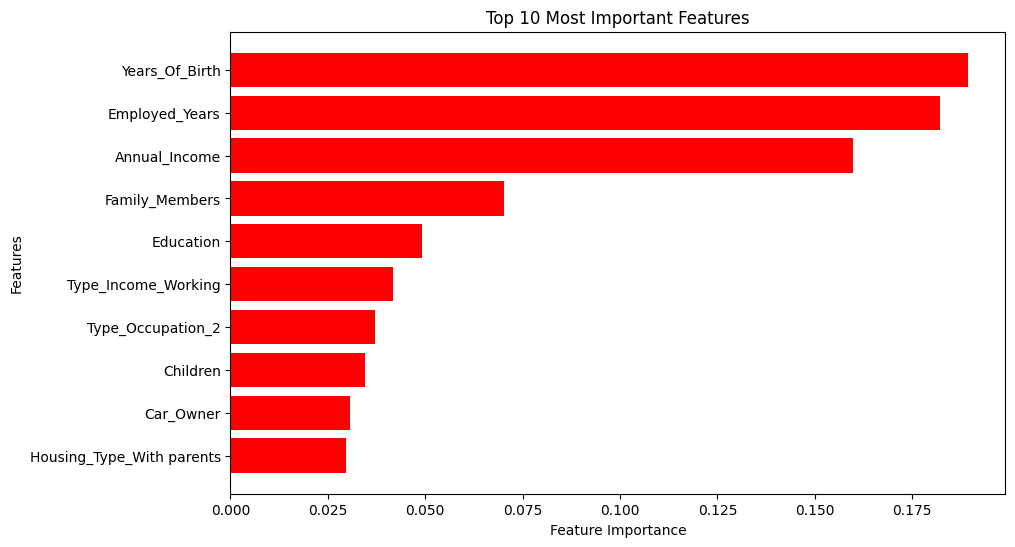

In [ ]:
# Creating a Random Forest classifier
rf_classifier = RandomForestClassifier(bootstrap = False, max_depth = None, min_samples_leaf = 1, min_samples_split= 5, n_estimators= 200, random_state=42)

# Fitting the model to the training data
rf_classifier.fit(X_train_selected, y_train_balanced)

# Getting feature importances from the trained model
feature_importances = rf_classifier.feature_importances_

# Creating a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature':selected_feature_name, 'Importance': feature_importances})

# Sorting the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Displaying the top N most important features
top_n = 10
top_features = feature_importance_df.head(top_n)

# Visualizing feature importance
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='red')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title(f'Top {top_n} Most Important Features')
plt.gca().invert_yaxis()
plt.show()


**Inference :**

1. As initial hypothesis, features such as **Employed_Years, Annual_Income, Education** plays an important role in credit card approval rates.
2. Interestingly, **Years_Of_Birth, Family_Members, Children, Car_Owner, Certain Occupations features** also have impact on credit_card approval rate.
3. Unlike initial hypothesis, **demographic factors such as Gender, Marital Status** have lesser importance as it doesn't make up in top 10 important features.



**MACHINE LEARNING SUMMARY**:

**Question and Answer**

1. **What method will you use for machine learning based predictions for credit card approval?**
> **Ans** : As it is classification problem choosing **Logistic Regression, Decision Tree, Random Forest, Support Vector Machine, K-Nearest Neighbors, XGBoost algorithms** to find which model have better accuracy.

2. **Please justify the most appropriate model**.
> **Ans** : **Random forest classifier** is our most appropriate model with mean cv accuracy of **95.5%**.

3. **Please perform necessary steps required to improve the accuracy of your model**.
> **Ans** : To enhance accuracy, we have conducted **hyperparameter tuning** in ML, earlier in Data analysis section have performed **feature engineering**, and applied dataset **balancing techniques like SMOTE**.

4. **Please compare all models (at least 4  models)**.
> **Ans** : Before hyperparameter tuning, 1. **Logistic Regression** :- Mean CV Accuracy: 0.7311588595916909, 2. **Decision Tree** :- Mean CV Accuracy: 0.8665119139733746, 3. **Random Forest** :- Mean CV Accuracy: 0.945219530583497, 4. **Support Vector Machine** :- Mean CV Accuracy: 0.8431879054818167, 5. **K-Nearest Neighbors** :- Mean CV Accuracy: 0.8450647778902051, 6. **XGBoost** :- Mean CV Accuracy: 0.9338888558220741.
After comparing these model, **Random Forest Classifier and XGBoost have highest accuracy**.



# **RECOMMENDATIONS :**

1. **Female owning car and property**, having **less no. of children**, working as **state servant**, who has **acedemic degree**, who is **civil married**, **living with parents**, earning **high annual income**, **age between 30 to 45** and having **lesser no. of family member** together have the **highest chance of loan approval rate**.

2. **Male who doesn't own car and property**, **not married, if married having more no. of children**, who is a **pensioner**, studied only till **lower secondary**, living in **co-op apartment**, have **more family members** together have the **least chance of getting credit card approval**.